# Replication Documentation for
## "World Shocks, World Prices, and Business Cycles: An Empirical Investigation" 
## By Fernandez, Grohe, Uribe (2017JIE)

<br>
<br>

<font size=4> Directly See Results at the bottom of the notebook. </font>
Or click [HERE](#results). 

<font size=4> <b>Table of Contents</b> </font>

- [Read in Data](#1setup)
- [Estimate Benchmark Model](#benchmark)
    - [Foreign bloc](#benchmark_foreign)
    - [Domestic Sequential](#benchmark_seq)
    - [Domestic Joint](#benchmark_joint)
    - Estimation of bias
        - [Sequential](#benchmark_seqBias)
        - [Joint](#benchmark_jointBias)
- [Estimate model with interest rate](#withIR)
- [Estimate model with interest rate](#withGY)
- [Estimate model with only single world price](#singleP)



In [1]:
import numpy as np
from scipy.io import loadmat
import pandas as pd
import pickle
from myFunctions import *
from matplotlib import pyplot as plt
import statsmodels.api as sm
import time
import warnings
warnings.filterwarnings("ignore")

start_time = time.time()

<a id="1setup"></a>
## Read In .mat Data

In [2]:
data_set = loadmat("data/source/fsu/vdet_hp100.mat")
# print(data_set.keys())

In [3]:
# print(data_set["readme"][0])

In [4]:
countries_lst = []
for cou in data_set["country_name"]:
    countries_lst.append(cou[0][0])

In [5]:
col_names = []
for cname in data_set['b'][0]:
    col_names.append(cname[0])

In [6]:
country_raw_lst = []
for y in range(len(data_set['raw_data'])):
    raw_t = pd.DataFrame(data_set['raw_data'][y], columns=countries_lst).T.reset_index().rename(columns={'index': 'Country'})
    country_raw_lst.append(raw_t)

col_rename = {'index': 'Country'}
for i, col in enumerate(col_names):
    col_rename[i] = col

raw_df = pd.concat(country_raw_lst).rename(columns=col_rename).sort_values(["Country", "Date"]).set_index(["Country", "Date"])

In [7]:
country_bp_lst = []
for c, country in enumerate(countries_lst):
    country_bp_df = pd.DataFrame(data_set['BP'][c][0], columns=col_names)
    country_bp_df["Country"] = countries_lst[c]
    country_bp_lst.append(country_bp_df)
    
df = pd.concat(country_bp_lst).set_index(["Country", "Date"])

## Replicate Figure 1.

### The Left Panels
Because these are *world* prices, they are time series *independent* of country. Taking the average would be the exact same numbers. All that is done is to take the time-series and normalize by data in 1960. 

In [8]:
Fig1_A_index = raw_df.groupby("Date").mean()["A"]
Fig1_A_index = Fig1_A_index / Fig1_A_index.iloc[0]

Fig1_M_index = raw_df.groupby("Date").mean()["M"]
Fig1_M_index = Fig1_M_index / Fig1_M_index.iloc[0]

Fig1_F_index = raw_df.groupby("Date").mean()["F"]
Fig1_F_index = Fig1_F_index / Fig1_F_index.iloc[0]

### The Right Panels
The right panels are obtained by applying HP filters. I referenced this [blog post](https://analyticsindiamag.com/a-complete-guide-to-hodrick-prescott-filter-in-time-series-analysis/) written by Yugesh Verma and the Python [Statsmodels package documentation](https://www.statsmodels.org/dev/generated/statsmodels.tsa.filters.hp_filter.hpfilter.html). 

Rule of thumb, set HP-Filter parameter ($\lambda$) to:
- <font color='blue'> **Yearly Data**: $\lambda = 100$ </font>
- **Quarterly data**: $\lambda = 14,400$
- **Monthly data**: $\lambda = 1,600$

In [9]:
Fig1_a_cycle, Fig1_a_trend = sm.tsa.filters.hpfilter(np.log(raw_df.groupby("Date").mean()["A"]), 100)
Fig1_m_cycle, Fig1_m_trend = sm.tsa.filters.hpfilter(np.log(raw_df.groupby("Date").mean()["M"]), 100)
Fig1_f_cycle, Fig1_f_trend = sm.tsa.filters.hpfilter(np.log(raw_df.groupby("Date").mean()["F"]), 100)

In [10]:
# # # # # # # # # # # # # # # # # #
#    |----  |    |--- |  -----    #
#    |   |  |    |    |    |      #
#    |---   |    |    |    |      #
#    |      |    |    |    |      #
#    |      |___ |___ |    |      #
# # # # # # # # # # # # # # # # # #

# Agricultrual Commodities
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16,6))
Fig1_A_index.plot(ax=ax1, linewidth=1)
(Fig1_a_cycle*100).plot(ax=ax2, linewidth=1)

ax1.set_xlim(1960, 2014)
ax2.set_xlim(1960, 2014)
ax1.set_ylim(0.2, 1.6)
ax2.set_ylim(-40,40)

ax1.grid(linestyle='--', alpha=0.8)
ax2.grid(linestyle='--', alpha=0.8)
ax1.set_title("Price Level, Agricultural Commodities", fontsize=15)
ax2.set_title("Cyclical Component, Agricultural Commodities", fontsize=15)
fig.savefig('figures/Fig1_Agri.png')


fig.show()
plt.close()

In [11]:
# Metals
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16,6))
Fig1_M_index.plot(ax=ax1, linewidth=1)
(Fig1_m_cycle*100).plot(ax=ax2, linewidth=1)


ax1.set_xlim(1960, 2014)
ax2.set_xlim(1960, 2014)
ax1.set_ylim(0.2, 1.6)
ax2.set_ylim(-40,40)

ax1.grid(linestyle='--', alpha=0.8)
ax2.grid(linestyle='--', alpha=0.8)
ax1.set_title("Price Level, Metals", fontsize=15)
ax2.set_title("Cyclical Component, Metals", fontsize=15)
fig.savefig('figures/Fig1_Metal.png')


fig.show()
plt.close()

In [12]:
# Fuels
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16,6))
Fig1_F_index.plot(ax=ax1, linewidth=1)
(Fig1_f_cycle*100).plot(ax=ax2, linewidth=1)


ax1.set_xlim(1960, 2014)
ax2.set_xlim(1960, 2014)
ax1.set_ylim(0, 10)
ax2.set_ylim(-43.5,58)

ax1.grid(linestyle='--', alpha=0.8)
ax2.grid(linestyle='--', alpha=0.8)
ax1.set_title("Price Level, Fuels", fontsize=15)
ax2.set_title("Cyclical Component, Fuells", fontsize=15)
fig.savefig('figures/Fig1_Fuel.png')


fig.show()
plt.close()

## Replicate Table 1.

Again, the data used in Table 1 uses price data from 1960-2014. It should also be noted that all real commodity prices are the cycles obtained AFTER applying the HP filter. Thus, we can recylce the computation done in Figure 1 (for Agri, Metal, and Fuels); and apply HP filter (with $\lambda=100$ for interest rates. Interest rates (R) reported in the raw data set is **net** interest rate ($r$). HP filter is applied to the log of **gross** interest rate ($1+r$).

<font color='blue'> This transformation with interest rates will deal with negative real rates when taking logs. </font>

In [13]:
Tab1_a_cycle = Fig1_a_cycle
Tab1_m_cycle = Fig1_m_cycle
Tab1_f_cycle = Fig1_f_cycle

# Interest Rate HP Filter with smoothing parameter 100.
[Tab1_r_cycle, Tab1_r_trend] = sm.tsa.filters.hpfilter(np.log((raw_df.groupby("Date").mean()["R"]/100 + 1)/100), 100)

Table1_data = [Tab1_a_cycle, Tab1_m_cycle, Tab1_f_cycle, Tab1_r_cycle]
Table1_cols = ["price_a", "price_m", "price_f", "interest"]
Table1_rows = ["Standard Dev", "Serial Correlation (1st order)", "Corr w/ Agri.", "Corr w/ Metals", "Corr w/ Fuels", 
                "Corr w/ Interest", "Relative Std", "**Relative Std (Jeff)**"]

In [14]:
# Standard Deviation
Table1_row1 = {}
for i, price in enumerate(Table1_data):
    Table1_row1[str(Table1_cols[i])] = np.std(price)

The serial (auto)correlation is $$ \text{corr}(x_t, x_{t-1}) $$. Naturally, becuase of this shift, we have to exclude the initial value, since data missing.

In [15]:
# Serial (Auto)Correlation (order 1)
Table1_row2 = {}
for i, price in enumerate(Table1_data):
    autocorr = np.corrcoef(price.shift(1).iloc[1:], price.iloc[1:])[0,1]
    Table1_row2[str(Table1_cols[i])] = autocorr

In [16]:
# Corr(Agri, X)
Table1_row3 = {}
for i, price in enumerate(Table1_data):
    agricorr = np.corrcoef(price, Tab1_a_cycle)[1,0]
    Table1_row3[str(Table1_cols[i])] = agricorr

In [17]:
# Corr(Metals, X)
Table1_row4 = {}
for i, price in enumerate(Table1_data):
    metalcorr = np.corrcoef(price, Tab1_m_cycle)[1,0]
    Table1_row4[str(Table1_cols[i])] = metalcorr

In [18]:
# Corr(Fuel, X)
Table1_row5 = {}
for i, price in enumerate(Table1_data):
    fuelcorr = np.corrcoef(price, Tab1_f_cycle)[1,0]
    Table1_row5[str(Table1_cols[i])] = fuelcorr

In [19]:
# Corr(Interest, X)
Table1_row6 = {}
for i, price in enumerate(Table1_data):
    intercorr = np.corrcoef(price, Tab1_r_cycle)[1,0]
    Table1_row6[str(Table1_cols[i])] = intercorr

As noted in the paper, the relative standard deviation with respect to GDP is an average over all countries. It wasn't noted, however, that standard deviation of GDP used data ONLY between the years of 1980-2014 (since data from the balanced panel was used).

In [20]:
# Relative Std
Table1_row7 = {}
for i, price in enumerate(Table1_data):
    stdP = np.std(price)
    stdY_avg = df.groupby("Country").std()['Y'].mean()
    
    Table1_row7[str(Table1_cols[i])] = stdP/stdY_avg



<font color='green'> 
    A minor note is that the "relative Std.Dev." part of Table 1 compares price standard deviation from 1960-2014 to GDP standard deviation from 1980-2014. I corrected for this. I do not think this makes much of a difference really. 
</font>

In [21]:
# Relative Std (Jeff)
Table1_row7_balanced = {}
for i, price in enumerate(Table1_data):
    stdP = np.std(price.loc[1980:])
    stdY_avg = df.groupby("Country").std()['Y'].mean()
    
    Table1_row7_balanced[str(Table1_cols[i])] = stdP/stdY_avg

In [22]:
Table1_output = pd.DataFrame([pd.Series(Table1_row1), 
                              pd.Series(Table1_row2), 
                              pd.Series(Table1_row3), 
                              pd.Series(Table1_row4), 
                              pd.Series(Table1_row5), 
                              pd.Series(Table1_row6), 
                              pd.Series(Table1_row7), 
                              pd.Series(Table1_row7_balanced)], index=Table1_rows)

Table1_output.round(2)

,price_a,price_m,price_f,interest
Standard Dev,0.11,0.17,0.21,0.01
Serial Correlation (1st order),0.57,0.52,0.47,0.36
Corr w/ Agri.,1.00,0.59,0.49,-0.01
Corr w/ Metals,0.59,1.00,0.35,0.16
Corr w/ Fuels,0.49,0.35,1.00,-0.24
Corr w/ Interest,-0.01,0.16,-0.24,1.00
Relative Std,2.68,3.88,4.95,0.32
**Relative Std (Jeff)**,2.46,4.54,4.23,0.30


In [23]:
#####################################
###  @@@@@ @@@@@ @    @ @@@@@@@   ###
###  @     @   @ @   @  @         ###
###  @@@@@ @@@@@ @  @   @@@@@     ###
###      @ @   @ @ @    @         ###
###  @@@@@ @   @ @@     @@@@@@@   ###
###       Summary Stats           ###
#####################################
OD_summary_stats = {"summaryStats": Table1_output}


with open('data/OD_summary_stats.pickle', 'wb') as handle:
    pickle.dump(OD_summary_stats, handle, protocol=pickle.HIGHEST_PROTOCOL)

<a id="benchmark"></a>


<a id="benchmark_foreign"></a>
## Replicate Estimation of Foreign Bloc (eq. 1, benchmark).


The next step is to find the OLS estimates for the matrix coefficient $A$, variance-covariance matrix $\Sigma_\mu$, and corresponding $R^2$ values of the following first-order autoregressive system: $$p_t = Ap_{t-1} + \mu_t $$

<div class="alert alert-block alert-info">
<b>Caution:</b> Make sure all the ordering of vector is in the following order $$\begin{bmatrix} A\\F\\M \end{bmatrix}$$
</div>

In [24]:
# Acquire HP-filtered prices (not lagged)
Eq1_a_cycle0 = Fig1_a_cycle.iloc[1:]
Eq1_f_cycle0 = Fig1_f_cycle.iloc[1:]
Eq1_m_cycle0 = Fig1_m_cycle.iloc[1:]


# Acquire HP-filtered prices (lagged by 1 period)
Eq1_a_cycle1 = Fig1_a_cycle.shift(1).iloc[1:]
Eq1_f_cycle1 = Fig1_f_cycle.shift(1).iloc[1:]
Eq1_m_cycle1 = Fig1_m_cycle.shift(1).iloc[1:]

# Define OLS variables
Eq1_temp_Y = pd.DataFrame([Eq1_a_cycle0, Eq1_f_cycle0, Eq1_m_cycle0]).T
Eq1_temp_X = pd.DataFrame([Eq1_a_cycle1, Eq1_f_cycle1, Eq1_m_cycle1]).T
Eq1_temp_X = sm.add_constant(Eq1_temp_X)


# Perform OLS and acquire coefficient
Eq1_model = sm.OLS(Eq1_temp_Y, Eq1_temp_X)
Eq1_results = Eq1_model.fit()
Eq1_coeff_A = Eq1_results.params.T.iloc[:, 1:].values

# Compute Error
Eq1_mu = Eq1_results.resid.T
Eq1_SigmaMu = np.cov(Eq1_mu)

# Compute R2
Eq1_r2 = (1- Eq1_mu.var(axis=1) / Eq1_temp_Y.T.var(axis=1)).values

In [25]:
print("\n A Matrix (Benchmark) \n", np.round(Eq1_coeff_A, 2))
print("\nError Covariance (Benchmark) \n", np.round(Eq1_SigmaMu, 4))
print("\nR-Squared (Benchmark)\n", np.round(Eq1_r2, 2))


 A Matrix (Benchmark) 
 [[ 0.64 -0.14  0.07]
 [ 0.58  0.29  0.11]
 [ 0.03 -0.21  0.61]]

Error Covariance (Benchmark) 
 [[0.0084 0.0063 0.0073]
 [0.0063 0.0312 0.0091]
 [0.0073 0.0091 0.019 ]]

R-Squared (Benchmark)
 [0.38 0.32 0.33]


In [26]:
#####################################
###  @@@@@ @@@@@ @    @ @@@@@@@   ###
###  @     @   @ @   @  @         ###
###  @@@@@ @@@@@ @  @   @@@@@     ###
###      @ @   @ @ @    @         ###
###  @@@@@ @   @ @@     @@@@@@@   ###
###  Benchmark: Foreign Bloc Est  ###
#####################################

OD_Benchmark_foreignBloc = {"A": Eq1_coeff_A, "SigMu":Eq1_SigmaMu, "r_squared":Eq1_r2}


with open('data/OD_Benchmark_foreignBloc.pickle', 'wb') as handle:
    pickle.dump(OD_Benchmark_foreignBloc, handle, protocol=pickle.HIGHEST_PROTOCOL)

## Replicate Estimation of Domestic Bloc (eq. 3, benchmark).

The idea follows similarily from Equation 1, but here, the domestic macro-economic variables are included in the autoregressive estimation. For each country $i$, the joint behavior of $p_t$ and $Y_t$ are described by the following autoregressive representation:

$$ \begin{bmatrix} p_t\\Y_t^i \end{bmatrix} = F^i \begin{bmatrix} p_{t-1} \\ Y_{t-1}^i \end{bmatrix} + G^i \begin{bmatrix} \mu_t \\ \epsilon_t^i \end{bmatrix},$$

where 

$$ F^i = \begin{bmatrix} A & \varnothing \\ D^iA+B^i & C^i\end{bmatrix}, \qquad G^i = \begin{bmatrix} I & \varnothing \\ D^i & I\end{bmatrix}, \quad \text{and } \qquad \Sigma = \begin{bmatrix} \Sigma_\mu & \varnothing \\ \varnothing & \Sigma_\epsilon \end{bmatrix},$$

where 

$$ Y^i_t = B^i p_{t-1} + C^i Y^i_{t-1} + D^i p_t + \epsilon_t^i .$$

Essentially, this is a SVAR, where the implied set of restrictions is that domestic macroeconomic conditions do not affect world prices. This is evident from the upper-right block of $F$ being zeros. Further, we assumed that shocks to domestic macroeconomic variables are independent from those affect world prices. Both of these assumptions are based on small open economies. 

<font color='grey'> Luca Gambetti has a very [nice introduction](http://pareto.uab.es/lgambetti/SVAR_Revision2_18_02_20_Part1.pdf) (though kind of long) on SVAR, and the [Wikipedia Article](https://en.wikipedia.org/wiki/Vector_autoregression) was also helpful. </font>

<div class="alert alert-block alert-info">
<b>Caution:</b> Make sure all the ordering of vector is in the following order $$\begin{bmatrix} A\\F\\M \end{bmatrix}$$
</div>

<a id="benchmark_seq"></a>
### Sequential Estimation
That is, if we set the macro-indicator as GDP ($Y$), we run the simple regression:
 $$ \underset{1\times1}{Y^i_t} = \text{const } + \underset{1\times 3}{B^i} {p_{t-1}} + \underset{1\times1}{C^i} {{Y}^i_{t-1}} + \underset{1\times3}{D^i} p_t + \epsilon_t^i .$$

This is repeated by replacing the LHS of the equation by {C, I, and TBY}. <font color='blue'> It should be noted that the RHS variable $Y_{t-1}$ is a scalar also.</font>

In [27]:
###########
# Loop through each country
###########
# Save F, ETA, and Obs. Length
Eq3bm_seq_params_dict = {}
Eq3bm_seq_impact_dict = {}
for country in countries_lst[:]:   ## @@@ TODO: Use full list
    # Acquire Data from balanced panel.
    _country_df0 = df.loc[country].iloc[1:]
    _country_df1 = df.loc[country].shift(1).iloc[1:]
    _country_obsRaw = _country_df0.shape[0] + 1  # add 1 because we threw away initial period
    
    # ------------
    # Macro In-period Matrix (LHS)
    _YI = _country_df0[['Y', 'C', 'I', 'TBY']]
    _YI = _YI.rename(columns={'Y':'Y0', 'C':'C0', 'I':'I0', 'TBY':'TBY0'})

    # ------------
    # Macro Lagged Matrix (RHS)
    _YL = _country_df1[['Y', 'C', 'I', 'TBY']]
    _YL = _YL.rename(columns={'Y':'Y1', 'C':'C1', 'I':'I1', 'TBY':'TBY1'})

    # Price In-period Matrix (RHS)
    _PI = _country_df0[['A', 'F', 'M']]
    _PI = _PI.rename(columns={'A':'A0', 'F':'F0', 'M':'M0'})

    # Price Lagged Matrix (RHS)
    _PL = _country_df1[['A', 'F', 'M']]
    _PL = _PL.rename(columns={'A':'A1', 'F':'F1', 'M':'M1'})



    ###########
    # Loop through each macro-indicator
    ###########
    _country_seq_decomposed = {}
    _country_seq_parameters = {}
    for _macroIndicator in ['Y', 'C', 'I', 'TBY']:
        _temp_Y = _YI[[_macroIndicator+'0']]
        _temp_X = pd.concat([_PL, _YL[[_macroIndicator+"1"]], _PI], axis=1)
        _temp_X = sm.add_constant(_temp_X)
        _numberofVars = 4
        _numberofPrices = 3

        # Conduct OLS estimation
        _model = sm.OLS(_temp_Y, _temp_X)
        _results = _model.fit()
        _coeff_seqCons = _results.params
        _coeff_seq = _coeff_seqCons.iloc[1:]

        # Pull Out the Coefficients
        _coeff_seq_A = Eq1_coeff_A # Taken from EQ1
        _coeff_seq_B = _coeff_seq[:_numberofPrices].values.reshape(1, _numberofPrices)
        _coeff_seq_C = _coeff_seq[_numberofPrices: _numberofVars].values.reshape(1, _numberofVars-_numberofPrices)
        _coeff_seq_D = _coeff_seq[-_numberofPrices:].values.reshape(1,_numberofPrices)

        _Sigma_e_seq_ = np.cov(_results.resid)

        # Generate the matrices F, G, Sigma
        # Fmat  --          --
        #      |  A       0  |
        # F =  |D*A +B    C  |
        #      --          --
        _Fmat_seq = np.block([[_coeff_seq_A,      np.zeros([_numberofPrices, _numberofVars-_numberofPrices])], 
                              [np.matmul(_coeff_seq_D, _coeff_seq_A)+_coeff_seq_B,     _coeff_seq_C]])

        # Gmat  --      --
        #      |  I   0  |
        # G =  |  D   I  |
        #      --      --
        _Gmat_seq = np.block([[np.eye(_numberofPrices),         np.zeros([_numberofPrices, _numberofVars-_numberofPrices])], 
                              [_coeff_seq_D,        np.eye(_numberofVars-_numberofPrices)]])


        # Sigma  --           --
        #       |  V_mu    0   |
        # S =   |   0   V_eps  |
        #       --           --
        _Sigma_seq = np.block([[Eq1_SigmaMu,    np.zeros([_numberofPrices, _numberofVars-_numberofPrices])], 
                               [np.zeros([_numberofVars-_numberofPrices, _numberofPrices]), _Sigma_e_seq_]])


        # Cholesky Decompose for Lower Triangle matrix
        ETA = np.linalg.cholesky(np.matmul(_Gmat_seq, np.matmul(_Sigma_seq,_Gmat_seq.T)))

        # Conduct variance decomposition
        _vd_filler = np.eye(_numberofVars)  # variance_decomposition function is written to have a contemporaneous relation; we dont need it for this exercise
        Vyr,Vxr,Vy,Vx = variance_decomposition(_vd_filler, _Fmat_seq, ETA)  # x and y are the same because we have set contemporaneous relation to identity.

        _totalPrice_impact = Vyr[:_numberofPrices,-1].sum()
        
        # Save specific indicator decompositon of a country to dict
        _country_seq_decomposed[_macroIndicator]=_totalPrice_impact
        
        # Save specific indicator parameters of a country to dict
        _country_seq_parameters[_macroIndicator] = (_country_obsRaw, _Fmat_seq, ETA)  
    
    # Save all indicator decompositions of a country to dict
    Eq3bm_seq_params_dict[country] = _country_seq_parameters
    # Save all indicator decompositions of a country to dict
    Eq3bm_seq_impact_dict[country] = _country_seq_decomposed

In [28]:
Eq3bm_seq_impact_byCountry = pd.DataFrame(Eq3bm_seq_impact_dict).T
Eq3bm_seq_impact_byCountry_med = Eq3bm_seq_impact_byCountry.median()

print("Uncorrected Median Variance Share of Sequential Est. (Benchmark) \n", np.round(Eq3bm_seq_impact_byCountry_med, 2))

Eq3bm_seq_impact_byCountry_mad = MedianAD(Eq3bm_seq_impact_byCountry, axis=0)

Uncorrected Median Variance Share of Sequential Est. (Benchmark) 
 Y      0.44
C      0.34
I      0.34
TBY    0.29
dtype: float64


<a id="benchmark_joint"></a>
### Joint Estimations 

In [29]:
###########
# Loop through each country
###########
# Save F, ETA, and Obs. Length
Eq3bm_joint_params_dict = {}
Eq3bm_joint_impact_dict = {}
for country in countries_lst:
    # Acquire Data from balanced panel.
    _country_df0 = df.loc[country].iloc[1:]
    _country_df1 = df.loc[country].shift(1).iloc[1:]
    _country_obsRaw = _country_df0.shape[0] + 1  # add 1 because we threw away initial period

    # ------------
    # Macro In-period Matrix (LHS)
    _YI = _country_df0[['Y', 'C', 'I', 'TBY']]
    _YI = _YI.rename(columns={'Y':'Y0', 'C':'C0', 'I':'I0', 'TBY':'TBY0'})

    # ------------
    # Macro Lagged Matrix (RHS)
    _YL = _country_df1[['Y', 'C', 'I', 'TBY']]
    _YL = _YL.rename(columns={'Y':'Y1', 'C':'C1', 'I':'I1', 'TBY':'TBY1'})

    # Price In-period Matrix (RHS)
    _PI = _country_df0[['A', 'F', 'M']]
    _PI = _PI.rename(columns={'A':'A0', 'F':'F0', 'M':'M0'})

    # Price Lagged Matrix (RHS)
    _PL = _country_df1[['A', 'F', 'M']]
    _PL = _PL.rename(columns={'A':'A1', 'F':'F1', 'M':'M1'})




    # _country_joint_decomposed = {}
    # _country_joint_parameters = {}




    _temp_Y = _YI
    _temp_X = pd.concat([_PL, _YL, _PI], axis=1)
    _temp_X = sm.add_constant(_temp_X)
    _numberofVars = 7
    _numberofPrices = 3

    # Conduct OLS estimation
    _model = sm.OLS(_temp_Y, _temp_X)
    _results = _model.fit()
    _coeff_jointCons = _results.params
    _coeff_joint = _coeff_jointCons.iloc[1:].T

    # Pull Out the Coefficients
    _coeff_joint_A = Eq1_coeff_A # Taken from EQ1
    _coeff_joint_B = _coeff_joint.iloc[:, :_numberofPrices].values
    _coeff_joint_C = _coeff_joint.iloc[:,_numberofPrices: _numberofVars].values
    _coeff_joint_D = _coeff_joint.iloc[:,-_numberofPrices:].values

    _Sigma_e_joint_ = np.cov(_results.resid.T)

    # Generate the matrices F, G, Sigma
    # Fmat  --          --
    #      |  A       0  |
    # F =  |D*A +B    C  |
    #      --          --
    _Fmat_joint = np.block([[_coeff_joint_A,      np.zeros([_numberofPrices, _numberofVars-_numberofPrices])], 
                          [np.matmul(_coeff_joint_D, _coeff_joint_A)+_coeff_joint_B,     _coeff_joint_C]])

    # Gmat  --      --
    #      |  I   0  |
    # G =  |  D   I  |
    #      --      --
    _Gmat_joint = np.block([[np.eye(_numberofPrices),         np.zeros([_numberofPrices, _numberofVars-_numberofPrices])], 
                          [_coeff_joint_D,        np.eye(_numberofVars-_numberofPrices)]])


    # Sigma  --           --
    #       |  V_mu    0   |
    # S =   |   0   V_eps  |
    #       --           --
    _Sigma_joint = np.block([[Eq1_SigmaMu,    np.zeros([_numberofPrices, _numberofVars-_numberofPrices])], 
                           [np.zeros([_numberofVars-_numberofPrices, _numberofPrices]), _Sigma_e_joint_]])


    # Cholesky Decompose for Lower Triangle matrix
    ETA = np.linalg.cholesky(np.matmul(_Gmat_joint, np.matmul(_Sigma_joint,_Gmat_joint.T)))

    # Conduct variance decomposition
    _vd_filler = np.eye(_numberofVars)  # variance_decomposition function is written to have a contemporaneous relation; we dont need it for this exercise
    Vyr,Vxr,Vy,Vx = variance_decomposition(_vd_filler, _Fmat_joint, ETA)  # x and y are the same because we have set contemporaneous relation to identity.

    _totalPrice_impact = Vyr[:_numberofPrices,-(_numberofVars-_numberofPrices):].sum(axis=0)
    
    # Save all indicator decompositions of a country to dict
    Eq3bm_joint_params_dict[country] = [_country_obsRaw, _Fmat_joint, ETA]
    # Save all indicator decompositions of a country to dict
    Eq3bm_joint_impact_dict[country] = _totalPrice_impact


In [30]:
Eq3bm_joint_impact_byCountry = pd.DataFrame(Eq3bm_joint_impact_dict, index=['Y', 'C', 'I', 'TBY']).T
Eq3bm_joint_impact_byCountry_med = Eq3bm_joint_impact_byCountry.median()

print("Uncorrected Median Variance Share of Joint Est. (Benchmark): \n", np.round(Eq3bm_joint_impact_byCountry_med, 2))

Eq3bm_joint_impact_byCountry_mad = MedianAD(Eq3bm_joint_impact_byCountry, axis=0)

Uncorrected Median Variance Share of Joint Est. (Benchmark): 
 Y      0.46
C      0.37
I      0.39
TBY    0.35
dtype: float64



<a id="benchmark_seqBias"></a>
## Replication of Table 2.

To replicate table 2, we need to use the estimates from equation 3. As outlined in the manuscript, the small sample bias is a [metric of accuracy](https://ag.arizona.edu/classes/rnr613/accuracy.html) obtained via Monte Carlo methods. Thus, we need to proceed in several steps:
1. Write a function that conducts simulation ``simulate_AR1()``.
    - According to the paper, simulation is conducted for 250 periods (years). 
    - <font color='green'> I wrote this function myself, as it's useful beyond this paper. </font>

2. Estimate share of variance using simulated data.
    - denote the computed share of variance $\bar{\sigma}$.
    - <font color='green'> This functionality is merged in the subsequent step. </font>
    
3. Write a function that measures bias based on simulated results ``bias_est()``. 
    - $\text{bias} = \bar{\sigma} - \hat{\sigma}$
    - Computation carried out exactly as before, except using selected simulated data.
    - Monte Carlo sampling: N=1000.
    - Small-sample bias defined as the average of simulated estimates net of actual estimates.
    - <font color='green'> I wrote this function myself, as it is just a generalization of the code above.
4. String together the aforementioned functions and apply to both sequential and joint estimates.

### Sequential Estimation

In [31]:
# Monte Carlo Sample Size
Tmontecarlo = 1000 # Todo: Change to 1000

Tab2_seq_bias = {}
for country in Eq3bm_seq_params_dict.keys():
    # Collect {"Y":*, "C":*, ...} for each country
    _country_seq_params_dict = Eq3bm_seq_params_dict[country]
    
    _country_seq_estBias = {}
    for _macroIndicator in _country_seq_params_dict.keys():
        # Collect totalObs, F, Eta for each country's macro-indicator
        _totalT_, _F_, _eta_ = _country_seq_params_dict[_macroIndicator]
        
        # Estimate Bias
        biasEst_tup = estimate_bias(_F_, _eta_, _totalT_, 55, _numberofPrices, Tmontecarlo)
        biasEst_val = float(biasEst_tup[0])
        
        # Save specific indicator estimated bias of a country to dict
        _country_seq_estBias[_macroIndicator] = biasEst_val
        
    # Save estimated bias of a country to dict
    Tab2_seq_bias[country] = _country_seq_estBias


In [32]:
Tab2_seq_biasEst_byCountry = pd.DataFrame(Tab2_seq_bias).T
Tab2_seq_biasEst_byCountry_med = Tab2_seq_biasEst_byCountry.median()
print("Sequential (Benchmark) Estimate of Bias: \n", np.round(Tab2_seq_biasEst_byCountry_med, 2))

Sequential (Benchmark) Estimate of Bias: 
 Y      0.10
C      0.13
I      0.12
TBY    0.13
dtype: float64


Compute corrected estimate by $$\text{corrected}(\sigma) = 2\hat{\sigma} - \bar{\sigma} = \hat{\sigma} - \text{bias} = \hat{\sigma} - (\bar{\sigma}-\hat{\sigma})$$, where $\hat{\sigma}$ is the share of variance estimated by real data and $\bar{\sigma}$ is the share of variance estimabed by *simulated* data.

In [33]:
Tab2_seq_corrImpact_byCountry = Eq3bm_seq_impact_byCountry - Tab2_seq_biasEst_byCountry
Tab2_seq_corrImpact_byCountry_med = Tab2_seq_corrImpact_byCountry.median()
print("Sequential (Benchmark) Corrected Estimates: \n", np.round(Tab2_seq_corrImpact_byCountry_med, 2))

Sequential (Benchmark) Corrected Estimates: 
 Y      0.34
C      0.21
I      0.22
TBY    0.16
dtype: float64


Here, we need to use the median absolute deviation. Python doesn't have a package for median absolute deviation, so <font color='green'>  I wrote one myself</font>. 

In [34]:
Tab2_seq_corrImpact_byCountry_mad = MedianAD(Tab2_seq_corrImpact_byCountry, axis=0)
print("Sequential (Benchmark) MAD of Corrected Est.: \n", np.round(Tab2_seq_corrImpact_byCountry_mad, 2))

Sequential (Benchmark) MAD of Corrected Est.: 
 Y      0.20
C      0.15
I      0.16
TBY    0.15
dtype: float64


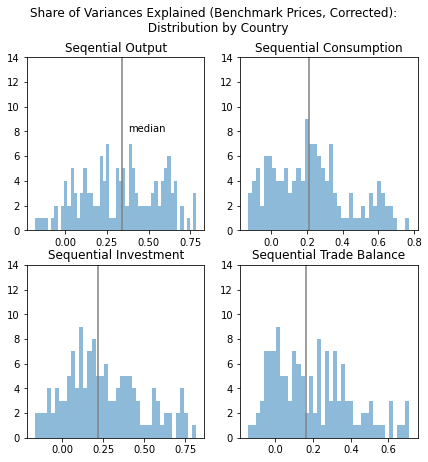

Corrected Median Variance Share of Sequential Est. (Benchmark) 
 Y      0.34
C      0.21
I      0.22
TBY    0.16
dtype: float64


In [35]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(7,7))

plt.suptitle("Share of Variances Explained (Benchmark Prices, Corrected): \n Distribution by Country")

axes[0,0].hist(Tab2_seq_corrImpact_byCountry["Y"], alpha=0.5, bins=50)
axes[0,0].set_title("Seqential Output")
axes[0,0].axvline(Tab2_seq_corrImpact_byCountry_med['Y'], color='grey')
axes[0,0].text(0.38, 8, "median")
axes[0,0].set_ylim([0,14])
axes[0,1].hist(Tab2_seq_corrImpact_byCountry["C"], alpha=0.5, bins=40)
axes[0,1].set_title("Sequential Consumption")
axes[0,1].axvline(Tab2_seq_corrImpact_byCountry_med['C'], color='grey')
axes[0,1].set_ylim([0,14])
axes[1,0].hist(Tab2_seq_corrImpact_byCountry["I"], alpha=0.5, bins=40)
axes[1,0].set_title("Sequential Investment")
axes[1,0].axvline(Tab2_seq_corrImpact_byCountry_med['I'], color='grey')
axes[1,0].set_ylim([0,14])
axes[1,1].hist(Tab2_seq_corrImpact_byCountry["TBY"], alpha=0.5, bins=40)
axes[1,1].set_title("Sequential Trade Balance")
axes[1,1].axvline(Tab2_seq_corrImpact_byCountry_med['TBY'], color='grey')
axes[1,1].set_ylim([0,14])
plt.show()

print("Corrected Median Variance Share of Sequential Est. (Benchmark) \n", Tab2_seq_corrImpact_byCountry.median().round(2))

<div class="alert alert-block alert-success">
<b>Idea:</b> Might be interesting to look into why this spread is big. Figure out which countries have higher pass through, which countries have lower. 
</div>

In [36]:
#####################################
###  @@@@@ @@@@@ @    @ @@@@@@@   ###
###  @     @   @ @   @  @         ###
###  @@@@@ @@@@@ @  @   @@@@@     ###
###      @ @   @ @ @    @         ###
###  @@@@@ @   @ @@     @@@@@@@   ###
###    Benchmark Seq. Results     ###
#####################################

OD_Benchmark_Seq = {"uncorrected_est": Eq3bm_seq_impact_byCountry_med,
                    "uncorrected_mad": Eq3bm_seq_impact_byCountry_mad,
                    "ssBias_est": Tab2_seq_biasEst_byCountry_med,
                    "ssBias_mcN": Tmontecarlo,
                    "corrected_est": Tab2_seq_corrImpact_byCountry_med,
                    "corrected_mad": Tab2_seq_corrImpact_byCountry_mad}

with open('data/OD_Benchmark_Seq.pickle', 'wb') as handle:
    pickle.dump(OD_Benchmark_Seq, handle, protocol=pickle.HIGHEST_PROTOCOL)

<a id="benchmark_jointBias"></a>
### Joint Estimation

In [37]:
# Monte Carlo Sample Size
# Tmontecarlo = 1 

Tab2_joint_bias = {}
for country in Eq3bm_joint_params_dict.keys():
    # Collect totalObs, F, Eta for each country
    _totalT_, _F_, _eta_ = Eq3bm_joint_params_dict[country]
    
    # Estimate Bias
    biasEst_tup = estimate_bias(_F_, _eta_, _totalT_, 55, _numberofPrices, Tmontecarlo)
    biasEst_val = biasEst_tup[0]
        
    # Save estimated bias of a country to dict
    Tab2_joint_bias[country] = biasEst_val


In [38]:
Tab2_joint_biasEst_byCountry = pd.DataFrame(Tab2_joint_bias, index=["Y", "C", "I", "TBY"]).T
Tab2_joint_biasEst_byCountry_med = Tab2_joint_biasEst_byCountry.median()
print("Joint (Benchmark) Estimate of Bias: \n", np.round(Tab2_seq_biasEst_byCountry_med, 2))

Joint (Benchmark) Estimate of Bias: 
 Y      0.10
C      0.13
I      0.12
TBY    0.13
dtype: float64


In [39]:
Tab2_joint_corrImpact_byCountry = Eq3bm_joint_impact_byCountry - Tab2_joint_biasEst_byCountry
Tab2_joint_corrImpact_byCountry_med = Tab2_joint_corrImpact_byCountry.median()
print("Joint (Benchmark) Corrected Estimates: \n", np.round(Tab2_joint_corrImpact_byCountry_med, 2))

Joint (Benchmark) Corrected Estimates: 
 Y      0.35
C      0.25
I      0.26
TBY    0.22
dtype: float64


In [40]:
Tab2_joint_corrImpact_byCountry_mad = MedianAD(Tab2_joint_corrImpact_byCountry, axis=0)
print("Joint (Benchmark) MAD of Corrected Est.: \n", np.round(Tab2_joint_corrImpact_byCountry_mad, 2))

Joint (Benchmark) MAD of Corrected Est.: 
 Y      0.20
C      0.18
I      0.17
TBY    0.15
dtype: float64


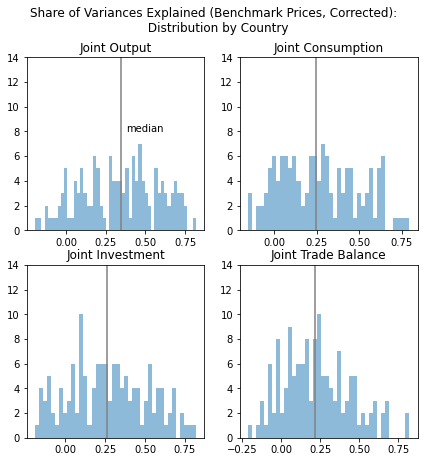

Corrected Median Variance Share of Joint Est. (Benchmark) 
 Y      0.35
C      0.25
I      0.26
TBY    0.22
dtype: float64


In [41]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(7,7))

plt.suptitle("Share of Variances Explained (Benchmark Prices, Corrected): \n Distribution by Country")

axes[0,0].hist(Tab2_joint_corrImpact_byCountry["Y"], alpha=0.5, bins=50)
axes[0,0].set_title("Joint Output")
axes[0,0].axvline(Tab2_joint_corrImpact_byCountry_med['Y'], color='grey')
axes[0,0].text(0.38, 8, "median")
axes[0,0].set_ylim([0,14])
axes[0,1].hist(Tab2_joint_corrImpact_byCountry["C"], alpha=0.5, bins=40)
axes[0,1].set_title("Joint Consumption")
axes[0,1].axvline(Tab2_joint_corrImpact_byCountry_med['C'], color='grey')
axes[0,1].set_ylim([0,14])
axes[1,0].hist(Tab2_joint_corrImpact_byCountry["I"], alpha=0.5, bins=40)
axes[1,0].set_title("Joint Investment")
axes[1,0].axvline(Tab2_joint_corrImpact_byCountry_med['I'], color='grey')
axes[1,0].set_ylim([0,14])
axes[1,1].hist(Tab2_joint_corrImpact_byCountry["TBY"], alpha=0.5, bins=40)
axes[1,1].set_title("Joint Trade Balance")
axes[1,1].axvline(Tab2_joint_corrImpact_byCountry_med['TBY'], color='grey')
axes[1,1].set_ylim([0,14])
plt.show()

print("Corrected Median Variance Share of Joint Est. (Benchmark) \n", Tab2_joint_corrImpact_byCountry.median().round(2))

In [42]:
#####################################
###  @@@@@ @@@@@ @    @ @@@@@@@   ###
###  @     @   @ @   @  @         ###
###  @@@@@ @@@@@ @  @   @@@@@     ###
###      @ @   @ @ @    @         ###
###  @@@@@ @   @ @@     @@@@@@@   ###
###    Benchmark Joint Results    ###
#####################################

OD_Benchmark_Jnt = {"uncorrected_est":Eq3bm_joint_impact_byCountry_med,
                    "uncorrected_mad":Eq3bm_joint_impact_byCountry_mad,
                    "ssBias_est":Tab2_joint_biasEst_byCountry_med,
                    "ssBias_mcN":Tmontecarlo,
                    "corrected_est":Tab2_joint_corrImpact_byCountry_med,
                    "corrected_mad":Tab2_joint_corrImpact_byCountry_mad}

with open('data/OD_Benchmark_Jnt.pickle', 'wb') as handle:
    pickle.dump(OD_Benchmark_Jnt, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [43]:
################################################################################################################
###################################   T    I    M    E     R     ###############################################
################################################################################################################
print("\n################################################################################################################\n###################################   T    I    M    E     R     ###############################################\n################################################################################################################\n")
end_time = time.time()
print(end_time - start_time, " seconds: BECHMARK (seq & joint)")
print("\n################################################################################################################\n###################################   T    I    M    E     R     ###############################################\n################################################################################################################")


################################################################################################################
###################################   T    I    M    E     R     ###############################################
################################################################################################################

2972.038177013397  seconds: BECHMARK (seq & joint)

################################################################################################################
###################################   T    I    M    E     R     ###############################################
################################################################################################################


-----
<font color='grey' size=3.5> Most of the hard work has already been done. Hereon out, we should only need to add/drop certain variables to the above code. In order to not confuse ourselves in this process, I will change the variable names accordingly too. </font>
<a id="withIR"></a>
## Replicate Estimation of Foreign Bloc (pg. 11 of NBER version, with interest).

Need to replace: 
- Eq1 --> Pg11
- Include interest ($R$) in OLS varaibles

In [44]:
# Acquire HP-filtered prices (not lagged)
Pg11_a_cycle0 = Fig1_a_cycle.iloc[1:]
Pg11_f_cycle0 = Fig1_f_cycle.iloc[1:]
Pg11_m_cycle0 = Fig1_m_cycle.iloc[1:]
Pg11_r_cycle0 = Tab1_r_cycle.iloc[1:]

# Acquire HP-filtered prices (lagged by 1 period)
Pg11_a_cycle1 = Fig1_a_cycle.shift(1).iloc[1:]
Pg11_f_cycle1 = Fig1_f_cycle.shift(1).iloc[1:]
Pg11_m_cycle1 = Fig1_m_cycle.shift(1).iloc[1:]
Pg11_r_cycle1 = Tab1_r_cycle.shift(1).iloc[1:]

# Define OLS variables
Pg11_temp_Y = pd.DataFrame([Pg11_a_cycle0, Pg11_f_cycle0, Pg11_m_cycle0, Pg11_r_cycle0]).T
Pg11_temp_X = pd.DataFrame([Pg11_a_cycle1, Pg11_f_cycle1, Pg11_m_cycle1, Pg11_r_cycle1]).T
Pg11_temp_X = sm.add_constant(Pg11_temp_X)


# Perform OLS and acquire coefficient
Pg11_model = sm.OLS(Pg11_temp_Y, Pg11_temp_X)
Pg11_results = Pg11_model.fit()
Pg11_coeff_A = Pg11_results.params.T.iloc[:, 1:].values

# Compute Error
Pg11_mu = Pg11_results.resid.T
Pg11_SigmaMu = np.cov(Pg11_mu)

# Compute R2
Pg11_r2 = (1- Pg11_mu.var(axis=1) / Pg11_temp_Y.T.var(axis=1)).values

In [45]:
print("\n A Matrix (w/ interest)\n", np.round(Pg11_coeff_A, 2))
print("\nError Covariance (w/ interest)\n", np.round(Pg11_SigmaMu, 4))
print("\nR-Squared (w/ interest)\n", np.round(Pg11_r2, 2))


 A Matrix (w/ interest)
 [[ 0.64 -0.14  0.08 -0.08]
 [ 0.58  0.35  0.04  3.01]
 [ 0.03 -0.21  0.6   0.36]
 [-0.02 -0.01 -0.    0.31]]

Error Covariance (w/ interest)
 [[ 0.0084  0.0063  0.0073  0.0002]
 [ 0.0063  0.0297  0.0089 -0.0002]
 [ 0.0073  0.0089  0.019   0.0003]
 [ 0.0002 -0.0002  0.0003  0.0001]]

R-Squared (w/ interest)
 [0.38 0.35 0.33 0.24]


In [46]:
#####################################
###  @@@@@ @@@@@ @    @ @@@@@@@   ###
###  @     @   @ @   @  @         ###
###  @@@@@ @@@@@ @  @   @@@@@     ###
###      @ @   @ @ @    @         ###
###  @@@@@ @   @ @@     @@@@@@@   ###
###  Interest Foreign Bloc Est   ###
#####################################

OD_IntRate_foreignBloc = {"A": Pg11_coeff_A, "SigMu":Pg11_SigmaMu, "r_squared":Pg11_r2}


with open('data/OD_IntRate_foreignBloc.pickle', 'wb') as handle:
    pickle.dump(OD_IntRate_foreignBloc, handle, protocol=pickle.HIGHEST_PROTOCOL)

## Replicate Estimation of Domestic Bloc (eq. 3, with interest) &  Replication of Table 3.


### Sequential 

<div class="alert alert-block alert-info">
<b>Caution:</b> Make sure all the ordering of vector is in the following order $$\begin{bmatrix} A\\F\\M \\ \color{blue}{R} \end{bmatrix}$$
</div>

Need to replace: 
- _numberofVars change from 4 --> 5
- _numberofPrices change from 3 --> 4
- Eq3bm --> Eq3tr
- Eq1 --> Pg11
- Include Interest ($R$) in ``_PI`` and ``_PL``

In [47]:
###########
# Loop through each country
###########
# Save F, ETA, and Obs. Length
Eq3tr_seq_params_dict = {}
Eq3tr_seq_impact_dict = {}
for country in countries_lst[:]:   ## @@@ TODO: Use full list
    # Acquire Data from balanced panel.
    _country_df0 = df.loc[country].iloc[1:]
    _country_df1 = df.loc[country].shift(1).iloc[1:]
    _country_obsRaw = _country_df0.shape[0] + 1  # add 1 because we threw away initial period
    
    # ------------
    # Macro In-period Matrix (LHS)
    _YI = _country_df0[['Y', 'C', 'I', 'TBY']]
    _YI = _YI.rename(columns={'Y':'Y0', 'C':'C0', 'I':'I0', 'TBY':'TBY0'})

    # ------------
    # Macro Lagged Matrix (RHS)
    _YL = _country_df1[['Y', 'C', 'I', 'TBY']]
    _YL = _YL.rename(columns={'Y':'Y1', 'C':'C1', 'I':'I1', 'TBY':'TBY1'})

    # Price In-period Matrix (RHS)
    _PI = _country_df0[['A', 'F', 'M', 'R']]
    _PI = _PI.rename(columns={'A':'A0', 'F':'F0', 'M':'M0', 'R':'R0'})

    # Price Lagged Matrix (RHS)
    _PL = _country_df1[['A', 'F', 'M', 'R']]
    _PL = _PL.rename(columns={'A':'A1', 'F':'F1', 'M':'M1', 'R':'R1'})



    ###########
    # Loop through each macro-indicator
    ###########
    _country_seq_decomposed = {}
    _country_seq_parameters = {}
    for _macroIndicator in ['Y', 'C', 'I', 'TBY']:
        _temp_Y = _YI[[_macroIndicator+'0']]
        _temp_X = pd.concat([_PL, _YL[[_macroIndicator+"1"]], _PI], axis=1)
        _temp_X = sm.add_constant(_temp_X)
        _numberofVars = 5
        _numberofPrices = 4

        # Conduct OLS estimation
        _model = sm.OLS(_temp_Y, _temp_X)
        _results = _model.fit()
        _coeff_seqCons = _results.params
        _coeff_seq = _coeff_seqCons.iloc[1:]

        # Pull Out the Coefficients
        _coeff_seq_A = Pg11_coeff_A # Taken from Eq1 with interest (i.e. pg11)
        _coeff_seq_B = _coeff_seq[:_numberofPrices].values.reshape(1, _numberofPrices)
        _coeff_seq_C = _coeff_seq[_numberofPrices: _numberofVars].values.reshape(1, _numberofVars-_numberofPrices)
        _coeff_seq_D = _coeff_seq[-_numberofPrices:].values.reshape(1,_numberofPrices)

        _Sigma_e_seq_ = np.cov(_results.resid)

        # Generate the matrices F, G, Sigma
        # Fmat  --          --
        #      |  A       0  |
        # F =  |D*A +B    C  |
        #      --          --
        _Fmat_seq = np.block([[_coeff_seq_A,      np.zeros([_numberofPrices, _numberofVars-_numberofPrices])], 
                              [np.matmul(_coeff_seq_D, _coeff_seq_A)+_coeff_seq_B,     _coeff_seq_C]])

        # Gmat  --      --
        #      |  I   0  |
        # G =  |  D   I  |
        #      --      --
        _Gmat_seq = np.block([[np.eye(_numberofPrices),         np.zeros([_numberofPrices, _numberofVars-_numberofPrices])], 
                              [_coeff_seq_D,        np.eye(_numberofVars-_numberofPrices)]])


        # Sigma  --           --
        #       |  V_mu    0   |
        # S =   |   0   V_eps  |
        #       --           --
        _Sigma_seq = np.block([[Pg11_SigmaMu,    np.zeros([_numberofPrices, _numberofVars-_numberofPrices])], 
                               [np.zeros([_numberofVars-_numberofPrices, _numberofPrices]), _Sigma_e_seq_]])


        # Cholesky Decompose for Lower Triangle matrix
        ETA = np.linalg.cholesky(np.matmul(_Gmat_seq, np.matmul(_Sigma_seq,_Gmat_seq.T)))

        # Conduct variance decomposition
        _vd_filler = np.eye(_numberofVars)  # variance_decomposition function is written to have a contemporaneous relation; we dont need it for this exercise
        Vyr,Vxr,Vy,Vx = variance_decomposition(_vd_filler, _Fmat_seq, ETA)  # x and y are the same because we have set contemporaneous relation to identity.

        _totalPrice_impact = Vyr[:_numberofPrices,-1].sum()
        
        # Save specific indicator decompositon of a country to dict
        _country_seq_decomposed[_macroIndicator]=_totalPrice_impact
        
        # Save specific indicator parameters of a country to dict
        _country_seq_parameters[_macroIndicator] = (_country_obsRaw, _Fmat_seq, ETA)  
    
    # Save all indicator decompositions of a country to dict
    Eq3tr_seq_params_dict[country] = _country_seq_parameters
    # Save all indicator decompositions of a country to dict
    Eq3tr_seq_impact_dict[country] = _country_seq_decomposed

In [48]:
Eq3tr_seq_impact_byCountry = pd.DataFrame(Eq3tr_seq_impact_dict).T
Eq3tr_seq_impact_byCountry_med = Eq3tr_seq_impact_byCountry.median()
print("Uncorrected Median Variance Share of Sequential Est. (w/ interest)\n", Eq3tr_seq_impact_byCountry_med.round(2))

Eq3tr_seq_impact_byCountry_mad = MedianAD(Eq3tr_seq_impact_byCountry, axis=0)

Uncorrected Median Variance Share of Sequential Est. (w/ interest)
 Y      0.55
C      0.44
I      0.45
TBY    0.37
dtype: float64



I was not able to find the "U.S. corporate bond spread" in the data provided online. For the purpose of replication, the process would be exactly the same--simply replace "Real T-bill rate" by the bond spread. To this end (and due to time limitation), I do not go online to search for the "corporate bond spread".

Need to replace: 
- Eq3bm --> Eq3tr
- Tab2 --> Tab3


In [49]:
# Monte Carlo Sample Size
# Tmontecarlo = 1

Tab3_seq_bias = {}
for country in Eq3tr_seq_params_dict.keys():
    # Collect {"Y":*, "C":*, ...} for each country
    _country_seq_params_dict = Eq3tr_seq_params_dict[country]
    
    _country_seq_estBias = {}
    for _macroIndicator in _country_seq_params_dict.keys():
        # Collect totalObs, F, Eta for each country's macro-indicator
        _totalT_, _F_, _eta_ = _country_seq_params_dict[_macroIndicator]
        
        # Estimate Bias
        biasEst_tup = estimate_bias(_F_, _eta_, _totalT_, 55, _numberofPrices, Tmontecarlo)
        biasEst_val = float(biasEst_tup[0])
        
        # Save specific indicator estimated bias of a country to dict
        _country_seq_estBias[_macroIndicator] = biasEst_val
        
    # Save estimated bias of a country to dict
    Tab3_seq_bias[country] = _country_seq_estBias


In [50]:
Tab3_seq_biasEst_byCountry = pd.DataFrame(Tab3_seq_bias).T
Tab3_seq_biasEst_byCountry_med = Tab3_seq_biasEst_byCountry.median()
print("Sequential (w/ interest) Estimate of Bias: \n", np.round(Tab3_seq_biasEst_byCountry_med, 2))

Sequential (w/ interest) Estimate of Bias: 
 Y      0.11
C      0.13
I      0.13
TBY    0.15
dtype: float64


In [51]:
Tab3_seq_corrImpact_byCountry = Eq3tr_seq_impact_byCountry - Tab3_seq_biasEst_byCountry
Tab3_seq_corrImpact_byCountry_med = Tab3_seq_corrImpact_byCountry.median()
print("Sequential (w/ interest) Corrected Estimates: \n", np.round(Tab3_seq_corrImpact_byCountry_med, 2))

Sequential (w/ interest) Corrected Estimates: 
 Y      0.44
C      0.30
I      0.33
TBY    0.23
dtype: float64


In [52]:
Tab3_seq_corrImpact_byCountry_mad = MedianAD(Tab3_seq_corrImpact_byCountry, axis=0)
print("Sequential (w/ interest) MAD of Corrected Est.: \n", np.round(Tab3_seq_corrImpact_byCountry_mad, 2))

Sequential (w/ interest) MAD of Corrected Est.: 
 Y      0.14
C      0.16
I      0.16
TBY    0.17
dtype: float64


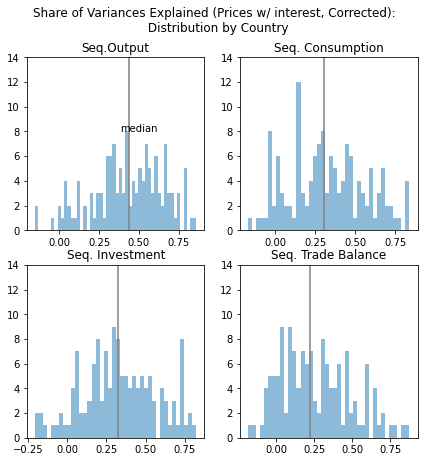

Corrected Median Variance Share of Sequential Est. (w/ interest)
 Y      0.44
C      0.30
I      0.33
TBY    0.23
dtype: float64


In [53]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(7,7))

plt.suptitle("Share of Variances Explained (Prices w/ interest, Corrected): \n Distribution by Country")

axes[0,0].hist(Tab3_seq_corrImpact_byCountry["Y"], alpha=0.5, bins=50)
axes[0,0].set_title("Seq.Output")
axes[0,0].axvline(Tab3_seq_corrImpact_byCountry_med['Y'], color='grey')
axes[0,0].text(0.38, 8, "median")
axes[0,0].set_ylim([0,14])
axes[0,1].hist(Tab3_seq_corrImpact_byCountry["C"], alpha=0.5, bins=40)
axes[0,1].set_title("Seq. Consumption")
axes[0,1].axvline(Tab3_seq_corrImpact_byCountry_med['C'], color='grey')
axes[0,1].set_ylim([0,14])
axes[1,0].hist(Tab3_seq_corrImpact_byCountry["I"], alpha=0.5, bins=40)
axes[1,0].set_title("Seq. Investment")
axes[1,0].axvline(Tab3_seq_corrImpact_byCountry_med['I'], color='grey')
axes[1,0].set_ylim([0,14])
axes[1,1].hist(Tab3_seq_corrImpact_byCountry["TBY"], alpha=0.5, bins=40)
axes[1,1].set_title("Seq. Trade Balance")
axes[1,1].axvline(Tab3_seq_corrImpact_byCountry_med['TBY'], color='grey')
axes[1,1].set_ylim([0,14])
plt.show()

print("Corrected Median Variance Share of Sequential Est. (w/ interest)\n", Tab3_seq_corrImpact_byCountry.median().round(2))

In [54]:
#####################################
###  @@@@@ @@@@@ @    @ @@@@@@@   ###
###  @     @   @ @   @  @         ###
###  @@@@@ @@@@@ @  @   @@@@@     ###
###      @ @   @ @ @    @         ###
###  @@@@@ @   @ @@     @@@@@@@   ###
###    w/ IntRate Seq. Results    ###
#####################################

OD_wIntRate_Seq = {"uncorrected_est": Eq3tr_seq_impact_byCountry_med,
                    "uncorrected_mad": Eq3tr_seq_impact_byCountry_mad,
                    "ssBias_est": Tab3_seq_biasEst_byCountry_med,
                    "ssBias_mcN": Tmontecarlo,
                    "corrected_est": Tab3_seq_corrImpact_byCountry_med,
                    "corrected_mad": Tab3_seq_corrImpact_byCountry_mad,}

with open('data/OD_wIntRate_Seq.pickle', 'wb') as handle:
    pickle.dump(OD_wIntRate_Seq, handle, protocol=pickle.HIGHEST_PROTOCOL)

### Joint Estimations 





In [55]:
###########
# Loop through each country
###########
# Save F, ETA, and Obs. Length
Eq3tr_joint_params_dict = {}
Eq3tr_joint_impact_dict = {}
for country in countries_lst:
    # Acquire Data from balanced panel.
    _country_df0 = df.loc[country].iloc[1:]
    _country_df1 = df.loc[country].shift(1).iloc[1:]
    _country_obsRaw = _country_df0.shape[0] + 1  # add 1 because we threw away initial period

    # ------------
    # Macro In-period Matrix (LHS)
    _YI = _country_df0[['Y', 'C', 'I', 'TBY']]
    _YI = _YI.rename(columns={'Y':'Y0', 'C':'C0', 'I':'I0', 'TBY':'TBY0'})

    # ------------
    # Macro Lagged Matrix (RHS)
    _YL = _country_df1[['Y', 'C', 'I', 'TBY']]
    _YL = _YL.rename(columns={'Y':'Y1', 'C':'C1', 'I':'I1', 'TBY':'TBY1'})

    # Price In-period Matrix (RHS)
    _PI = _country_df0[['A', 'F', 'M', 'R']]
    _PI = _PI.rename(columns={'A':'A0', 'F':'F0', 'M':'M0', 'R':'R0'})

    # Price Lagged Matrix (RHS)
    _PL = _country_df1[['A', 'F', 'M', 'R']]
    _PL = _PL.rename(columns={'A':'A1', 'F':'F1', 'M':'M1', 'R':'R1'})
    

    _temp_Y = _YI
    _temp_X = pd.concat([_PL, _YL, _PI], axis=1)
    _temp_X = sm.add_constant(_temp_X)
    _numberofVars = 8
    _numberofPrices = 4

    # Conduct OLS estimation
    _model = sm.OLS(_temp_Y, _temp_X)
    _results = _model.fit()
    _coeff_jointCons = _results.params
    _coeff_joint = _coeff_jointCons.iloc[1:].T

    # Pull Out the Coefficients
    _coeff_joint_A = Pg11_coeff_A # Taken from Pg11
    _coeff_joint_B = _coeff_joint.iloc[:, :_numberofPrices].values
    _coeff_joint_C = _coeff_joint.iloc[:,_numberofPrices: _numberofVars].values
    _coeff_joint_D = _coeff_joint.iloc[:,-_numberofPrices:].values

    _Sigma_e_joint_ = np.cov(_results.resid.T)

    # Generate the matrices F, G, Sigma
    # Fmat  --          --
    #      |  A       0  |
    # F =  |D*A +B    C  |
    #      --          --
    _Fmat_joint = np.block([[_coeff_joint_A,      np.zeros([_numberofPrices, _numberofVars-_numberofPrices])], 
                          [np.matmul(_coeff_joint_D, _coeff_joint_A)+_coeff_joint_B,     _coeff_joint_C]])

    # Gmat  --      --
    #      |  I   0  |
    # G =  |  D   I  |
    #      --      --
    _Gmat_joint = np.block([[np.eye(_numberofPrices),         np.zeros([_numberofPrices, _numberofVars-_numberofPrices])], 
                          [_coeff_joint_D,        np.eye(_numberofVars-_numberofPrices)]])


    # Sigma  --           --
    #       |  V_mu    0   |
    # S =   |   0   V_eps  |
    #       --           --
    _Sigma_joint = np.block([[Pg11_SigmaMu,    np.zeros([_numberofPrices, _numberofVars-_numberofPrices])], 
                           [np.zeros([_numberofVars-_numberofPrices, _numberofPrices]), _Sigma_e_joint_]])


    # Cholesky Decompose for Lower Triangle matrix
    ETA = np.linalg.cholesky(np.matmul(_Gmat_joint, np.matmul(_Sigma_joint,_Gmat_joint.T)))

    # Conduct variance decomposition
    _vd_filler = np.eye(_numberofVars)  # variance_decomposition function is written to have a contemporaneous relation; we dont need it for this exercise
    Vyr,Vxr,Vy,Vx = variance_decomposition(_vd_filler, _Fmat_joint, ETA)  # x and y are the same because we have set contemporaneous relation to identity.

    _totalPrice_impact = Vyr[:_numberofPrices,-(_numberofVars-_numberofPrices):].sum(axis=0)
    
    # Save all indicator decompositions of a country to dict
    Eq3tr_joint_params_dict[country] = [_country_obsRaw, _Fmat_joint, ETA]
    # Save all indicator decompositions of a country to dict
    Eq3tr_joint_impact_dict[country] = _totalPrice_impact


In [56]:
Eq3tr_joint_impact_byCountry = pd.DataFrame(Eq3tr_joint_impact_dict, index=['Y', 'C', 'I', 'TBY']).T
Eq3tr_joint_impact_byCountry_med = Eq3tr_joint_impact_byCountry.median()

Eq3tr_joint_impact_byCountry_mad = MedianAD(Eq3tr_joint_impact_byCountry, axis=0)

In [57]:
# Monte Carlo Sample Size
# Tmontecarlo = 1 

Tab3_joint_bias = {}
for country in Eq3bm_joint_params_dict.keys():
    # Collect totalObs, F, Eta for each country
    _totalT_, _F_, _eta_ = Eq3tr_joint_params_dict[country]
    
    # Estimate Bias
    biasEst_tup = estimate_bias(_F_, _eta_, _totalT_, 55, _numberofPrices, Tmontecarlo)
    biasEst_val = biasEst_tup[0]
        
    # Save estimated bias of a country to dict
    Tab3_joint_bias[country] = biasEst_val


In [58]:
Tab3_joint_biasEst_byCountry = pd.DataFrame(Tab3_joint_bias, index=["Y", "C", "I", "TBY"]).T
Tab3_joint_biasEst_byCountry_med = Tab3_joint_biasEst_byCountry.median()
print("Joint (w/ interest) Estimate of Bias: \n", np.round(Tab3_joint_biasEst_byCountry_med, 2))

Joint (w/ interest) Estimate of Bias: 
 Y      0.11
C      0.14
I      0.14
TBY    0.15
dtype: float64


In [59]:
Tab3_joint_corrImpact_byCountry = Eq3bm_joint_impact_byCountry - Tab3_joint_biasEst_byCountry
Tab3_joint_corrImpact_byCountry_med = Tab3_joint_corrImpact_byCountry.median()
print("Joint (w/ interest) Corrected Estimates: \n", np.round(Tab3_joint_corrImpact_byCountry_med, 2))

Joint (w/ interest) Corrected Estimates: 
 Y      0.33
C      0.24
I      0.26
TBY    0.20
dtype: float64


In [60]:
Tab3_joint_corrImpact_byCountry_mad = MedianAD(Tab3_joint_corrImpact_byCountry, axis=0)
print("Joint (w/ interest) MAD of Corrected Est.: \n", np.round(Tab3_joint_corrImpact_byCountry_mad, 2))

Joint (w/ interest) MAD of Corrected Est.: 
 Y      0.19
C      0.17
I      0.18
TBY    0.16
dtype: float64


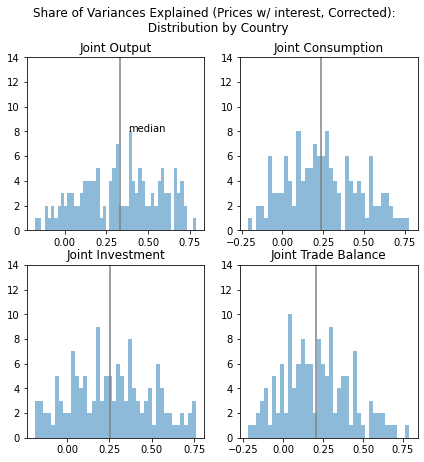

Corrected Median Variance Share of Joint Est. (w/ interest)
 Y      0.33
C      0.24
I      0.26
TBY    0.20
dtype: float64


In [61]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(7,7))

plt.suptitle("Share of Variances Explained (Prices w/ interest, Corrected): \n Distribution by Country")

axes[0,0].hist(Tab3_joint_corrImpact_byCountry["Y"], alpha=0.5, bins=50)
axes[0,0].set_title("Joint Output")
axes[0,0].axvline(Tab3_joint_corrImpact_byCountry_med['Y'], color='grey')
axes[0,0].text(0.38, 8, "median")
axes[0,0].set_ylim([0,14])
axes[0,1].hist(Tab3_joint_corrImpact_byCountry["C"], alpha=0.5, bins=40)
axes[0,1].set_title("Joint Consumption")
axes[0,1].axvline(Tab3_joint_corrImpact_byCountry_med['C'], color='grey')
axes[0,1].set_ylim([0,14])
axes[1,0].hist(Tab3_joint_corrImpact_byCountry["I"], alpha=0.5, bins=40)
axes[1,0].set_title("Joint Investment")
axes[1,0].axvline(Tab3_joint_corrImpact_byCountry_med['I'], color='grey')
axes[1,0].set_ylim([0,14])
axes[1,1].hist(Tab3_joint_corrImpact_byCountry["TBY"], alpha=0.5, bins=40)
axes[1,1].set_title("Joint Trade Balance")
axes[1,1].axvline(Tab3_joint_corrImpact_byCountry_med['TBY'], color='grey')
axes[1,1].set_ylim([0,14])
plt.show()

print("Corrected Median Variance Share of Joint Est. (w/ interest)\n", Tab3_joint_corrImpact_byCountry.median().round(2))

In [62]:
#####################################
###  @@@@@ @@@@@ @    @ @@@@@@@   ###
###  @     @   @ @   @  @         ###
###  @@@@@ @@@@@ @  @   @@@@@     ###
###      @ @   @ @ @    @         ###
###  @@@@@ @   @ @@     @@@@@@@   ###
###    w/ IntRate Joint Results   ###
#####################################

OD_wIntRate_Jnt = {"uncorrected_est": Eq3tr_joint_impact_byCountry_med,
                    "uncorrected_mad": Eq3tr_joint_impact_byCountry_mad,
                    "ssBias_est": Tab3_joint_biasEst_byCountry_med,
                    "ssBias_mcN": Tmontecarlo,
                    "corrected_est": Tab3_joint_corrImpact_byCountry_med,
                    "corrected_mad": Tab3_joint_corrImpact_byCountry_mad,}

with open('data/OD_wIntRate_Jnt.pickle', 'wb') as handle:
    pickle.dump(OD_wIntRate_Jnt, handle, protocol=pickle.HIGHEST_PROTOCOL)

<a id="withGY"></a>
## Replication of Table 4. 

Here, to conform to the specification where world shocks can affect the domestic economy directly through variations in global economy, we need to directly use "global output." As defined by the authors, global output is the sum of GDP's of the 29 largest economies. We need to construct this "global output" data ourselves. One burning question is *29 biggest economies when?*

In [63]:
# 29 countries with largest output as of 2014 (as per raw data)
raw_df.xs(2014, level=1)["Y"].sort_values(ascending=False).iloc[:29]

Country
Indonesia             8.570000e+15
Uganda                5.060000e+13
Thailand              5.080000e+12
Equatorial Guinea     4.870000e+12
Kenya                 3.830000e+12
Costa Rica            2.560000e+12
Mauritania            8.440000e+11
Malaysia              8.350000e+11
Uruguay               6.710000e+11
Egypt, Arab Rep.      6.230000e+11
Peru                  4.670000e+11
Guatemala             2.310000e+11
Ecuador               6.960000e+10
Panama                3.560000e+10
Sudan                 2.810000e+10
Gambia, The           2.290000e+10
Jordan                1.110000e+10
Iran, Islamic Rep.    2.075699e+06
Korea, Rep.           1.426540e+06
Japan                 5.269267e+05
Colombia              5.166190e+05
Chile                 1.164269e+05
India                 1.064398e+05
Nigeria               6.797746e+04
Myanmar               5.301771e+04
Lebanon               4.801549e+04
Russian Federation    4.370846e+04
Tanzania              4.123136e+04
Cambodia    

This drove me crazy... Indonesia is the biggest? African economies are ranked so high?!! United States IS the list of coutries, but not the largest (not even in the top 29)! As such, I went into the raw data provided and realized that the units (at least for output) is completely different across different countries <font color='red'> (see attached figure) </font>.

I don't think this will affect the replication before because for the analysis before, I used the BALANCED PANEL (instead of the raw data). The BALANCED PANEL provides the hp-filtered data. 

<div class="alert alert-block alert-success">
<b>Idea:</b> Might be interesting to look into whether/ how changing units would affect the analysis before. I suspect that the impact may be minimal since hp-filter was applied to logged variables (magitudinal differences reduced) and the cyclical component (levels don't matter anymore) was taken for analysis. Lastly, I am skeptical that they have not unified the magnitudes when generating the BALANCED PANEL.
</div>

<font color='blue'> I'm just going to define the 29 largest economies as 29 largest economies in 2014. I employed World Bank's WDI database to get all the country's GDP in current USD for the years 1960-2014(data version: "Dec 2022"). </font>

In [64]:
wdi_df = pd.read_csv("data/source/WDI_data.csv", index_col="Country Name").replace('..', np.nan)
wdi_df = wdi_df.iloc[:, 5:]  # Drop descriptive columns

# Set "1999 [YR1999]" to float(1999)
wdi_rename_years = dict(zip(list(wdi_df), [float(colstr[:4]) for colstr in list(wdi_df)]))  # Rename columns to drop YR1994

# Set countries so FSU and WDI names match
wdi_rename_countries_lst_dict = {"Cape Verde": "Cabo Verde",  # FSU uses Cabo (proper) while WB uses Cape (direlect)
                                 "Congo, Dem. Rep.": "Congo, Rep.", 
                                 "Egypt": "Egypt, Arab Rep.", 
                                 "Iran": "Iran, Islamic Rep.", 
                                 "Korea": "Korea, Rep.", 
                                 "Russia": "Russian Federation", 
                                 "Venezuela": "Venezuela, RB", 
                                 "Yemen": "Yemen, Rep."}
# Rename index and columns accordingly
wdi_df = wdi_df.rename(columns=wdi_rename_years, index=wdi_rename_countries_lst_dict)


# Selecting the overlapping countries between FSU and WDI
wdi_df = wdi_df.loc[countries_lst]


# Dealing the data types
wdi_df = wdi_df.dropna()
wdi_df = wdi_df.astype(float)

# See top 29 largest economies
world29_lst = list(wdi_df[2014].sort_values(ascending=False).iloc[:29].index)
# wdi_df[2014].sort_values(ascending=False).iloc[:29]

In [65]:
# Get the time series of outputs for the top 29 economies
world29_Yseries = wdi_df.loc[world29_lst].sum().T
world29_Yseries.name = "GO"

# Apply hp filter to world prices
world29_y_cycle, world29_y_trend = sm.tsa.filters.hpfilter(np.log(world29_Yseries), 100)

In [66]:
# Include World29 cycle into df.
df = df.reset_index().set_index(["Date"])
df["GY"] = df.index.map(dict(world29_y_cycle))
df = df.reset_index().set_index(["Country", "Date"])

### Table 4 Panel C.

Compared to the BENCHMARK, need to replace:
- Eq1 --> Tab4C
- Include World29Price into OLS regressor

In [67]:
############
## Foreign bloc 
############

# Acquire HP-filtered prices (not lagged)
Tab4C_a_cycle0 = Fig1_a_cycle.iloc[1:]
Tab4C_f_cycle0 = Fig1_f_cycle.iloc[1:]
Tab4C_m_cycle0 = Fig1_m_cycle.iloc[1:]
Tab4C_y29_cycle0 = world29_y_cycle.iloc[1:]

# Acquire HP-filtered prices (lagged by 1 period)
Tab4C_a_cycle1 = Fig1_a_cycle.shift(1).iloc[1:]
Tab4C_f_cycle1 = Fig1_f_cycle.shift(1).iloc[1:]
Tab4C_m_cycle1 = Fig1_m_cycle.shift(1).iloc[1:]
Tab4C_y29_cycle1 = world29_y_cycle.shift(1).iloc[1:]

# Define OLS variables
Tab4C_temp_Y = pd.DataFrame([Tab4C_a_cycle0, Tab4C_f_cycle0, Tab4C_m_cycle0, Tab4C_y29_cycle0]).T
Tab4C_temp_X = pd.DataFrame([Tab4C_a_cycle1, Tab4C_f_cycle1, Tab4C_m_cycle1, Tab4C_y29_cycle1]).T
Tab4C_temp_X = sm.add_constant(Tab4C_temp_X)


# Perform OLS and acquire coefficient
Tab4C_model = sm.OLS(Tab4C_temp_Y, Tab4C_temp_X)
Tab4C_results = Tab4C_model.fit()
Tab4C_coeff_A = Tab4C_results.params.T.iloc[:, 1:].values

# Compute Error
Tab4C_mu = Tab4C_results.resid.T
Tab4C_SigmaMu = np.cov(Tab4C_mu)

# Compute R2
Tab4C_r2 = (1- Tab4C_mu.var(axis=1) / Tab4C_temp_Y.T.var(axis=1)).values

# ## PRINT RESULTS ##
# print("\n A Matrix (w/ global output)\n", np.round(Tab4C_coeff_A, 2))
# print("\nError Covariance (w/ global output)\n", np.round(Tab4C_SigmaMu, 4))
# print("\nR-Squared (w/ global output)\n", np.round(Tab4C_r2, 2))

Need to replace: 
- _numberofVars change from 4 --> 5
- _numberofPrices change from 3 --> 4
- Eq3bm --> Tab4C
- Eq1 --> Tab4C
- Include World29Price into ``_PL`` and ``_PI``

In [68]:
############
## Domestic bloc 
############

# --------
# Loop through each country
# --------
# Save F, ETA, and Obs. Length
Tab4C_seq_params_dict = {}
Tab4C_seq_impact_dict = {}
for country in countries_lst[:]:   ## @@@ TODO: Use full list
    # Acquire Data from balanced panel.
    _country_df0 = df.loc[country].iloc[1:]
    _country_df1 = df.loc[country].shift(1).iloc[1:]
    _country_obsRaw = _country_df0.shape[0] + 1  # add 1 because we threw away initial period
    
    # ------------
    # Macro In-period Matrix (LHS)
    _YI = _country_df0[['Y', 'C', 'I', 'TBY']]
    _YI = _YI.rename(columns={'Y':'Y0', 'C':'C0', 'I':'I0', 'TBY':'TBY0'})

    # ------------
    # Macro Lagged Matrix (RHS)
    _YL = _country_df1[['Y', 'C', 'I', 'TBY']]
    _YL = _YL.rename(columns={'Y':'Y1', 'C':'C1', 'I':'I1', 'TBY':'TBY1'})

    # Price In-period Matrix (RHS)
    _PI = _country_df0[['A', 'F', 'M', 'GY']]
    _PI = _PI.rename(columns={'A':'A0', 'F':'F0', 'M':'M0', 'GY':'GY0'})

    # Price Lagged Matrix (RHS)
    _PL = _country_df1[['A', 'F', 'M', 'GY']]
    _PL = _PL.rename(columns={'A':'A1', 'F':'F1', 'M':'M1', 'GY':'GY1'})



    # --------
    # Loop through each macro-indicator
    # --------
    _country_seq_decomposed = {}
    _country_seq_parameters = {}
    for _macroIndicator in ['Y', 'C', 'I', 'TBY']:
        _temp_Y = _YI[[_macroIndicator+'0']]
        _temp_X = pd.concat([_PL, _YL[[_macroIndicator+"1"]], _PI], axis=1)
        _temp_X = sm.add_constant(_temp_X)
        _numberofVars = 5
        _numberofPrices = 4

        # Conduct OLS estimation
        _model = sm.OLS(_temp_Y, _temp_X)
        _results = _model.fit()
        _coeff_seqCons = _results.params
        _coeff_seq = _coeff_seqCons.iloc[1:]

        # Pull Out the Coefficients
        _coeff_seq_A = Tab4C_coeff_A # Taken from foreign estimates
        _coeff_seq_B = _coeff_seq[:_numberofPrices].values.reshape(1, _numberofPrices)
        _coeff_seq_C = _coeff_seq[_numberofPrices: _numberofVars].values.reshape(1, _numberofVars-_numberofPrices)
        _coeff_seq_D = _coeff_seq[-_numberofPrices:].values.reshape(1,_numberofPrices)

        _Sigma_e_seq_ = np.cov(_results.resid)

        # Generate the matrices F, G, Sigma
        # Fmat  --          --
        #      |  A       0  |
        # F =  |D*A +B    C  |
        #      --          --
        _Fmat_seq = np.block([[_coeff_seq_A,      np.zeros([_numberofPrices, _numberofVars-_numberofPrices])], 
                              [np.matmul(_coeff_seq_D, _coeff_seq_A)+_coeff_seq_B,     _coeff_seq_C]])

        # Gmat  --      --
        #      |  I   0  |
        # G =  |  D   I  |
        #      --      --
        _Gmat_seq = np.block([[np.eye(_numberofPrices),         np.zeros([_numberofPrices, _numberofVars-_numberofPrices])], 
                              [_coeff_seq_D,        np.eye(_numberofVars-_numberofPrices)]])


        # Sigma  --           --
        #       |  V_mu    0   |
        # S =   |   0   V_eps  |
        #       --           --
        _Sigma_seq = np.block([[Tab4C_SigmaMu,    np.zeros([_numberofPrices, _numberofVars-_numberofPrices])], 
                               [np.zeros([_numberofVars-_numberofPrices, _numberofPrices]), _Sigma_e_seq_]])


        # Cholesky Decompose for Lower Triangle matrix
        ETA = np.linalg.cholesky(np.matmul(_Gmat_seq, np.matmul(_Sigma_seq,_Gmat_seq.T)))

        # Conduct variance decomposition
        _vd_filler = np.eye(_numberofVars)  # variance_decomposition function is written to have a contemporaneous relation; we dont need it for this exercise
        Vyr,Vxr,Vy,Vx = variance_decomposition(_vd_filler, _Fmat_seq, ETA)  # x and y are the same because we have set contemporaneous relation to identity.

        _totalPrice_impact = Vyr[:_numberofPrices,-1].sum()
        
        # Save specific indicator decompositon of a country to dict
        _country_seq_decomposed[_macroIndicator]=_totalPrice_impact
        
        # Save specific indicator parameters of a country to dict
        _country_seq_parameters[_macroIndicator] = (_country_obsRaw, _Fmat_seq, ETA)  
    
    # Save all indicator decompositions of a country to dict
    Tab4C_seq_params_dict[country] = _country_seq_parameters
    # Save all indicator decompositions of a country to dict
    Tab4C_seq_impact_dict[country] = _country_seq_decomposed

    
## RESULTS ##
Tab4C_seq_impact_byCountry = pd.DataFrame(Tab4C_seq_impact_dict).T
Tab4C_seq_impact_byCountry_med = Tab4C_seq_impact_byCountry.median()

Tab4C_seq_impact_byCountry_mad = MedianAD(Tab4C_seq_impact_byCountry, axis=0)

Need to replace: 
- Eq3bm --> Tab4C
- Tab2 --> Tab4C

In [69]:
# Monte Carlo Sample Size
# Tmontecarlo = 1#00

Tab4C_seq_bias = {}
for country in Tab4C_seq_params_dict.keys():
    # Collect {"Y":*, "C":*, ...} for each country
    _country_seq_params_dict = Tab4C_seq_params_dict[country]
    
    _country_seq_estBias = {}
    for _macroIndicator in _country_seq_params_dict.keys():
        # Collect totalObs, F, Eta for each country's macro-indicator
        _totalT_, _F_, _eta_ = _country_seq_params_dict[_macroIndicator]
        
        # Estimate Bias
        biasEst_tup = estimate_bias(_F_, _eta_, _totalT_, 55, _numberofPrices, Tmontecarlo)
        biasEst_val = float(biasEst_tup[0])
        
        # Save specific indicator estimated bias of a country to dict
        _country_seq_estBias[_macroIndicator] = biasEst_val
        
    # Save estimated bias of a country to dict
    Tab4C_seq_bias[country] = _country_seq_estBias

## PRINT RESULTS ##
Tab4C_seq_biasEst_byCountry = pd.DataFrame(Tab4C_seq_bias).T
Tab4C_seq_biasEst_byCountry_med = Tab4C_seq_biasEst_byCountry.median()
# print("Sequential (w/ global output) Estimate of Bias: \n", np.round(Tab4C_seq_biasEst_byCountry_med, 2), "\n---------- \n")

Tab4C_seq_corrImpact_byCountry = Tab4C_seq_impact_byCountry - Tab4C_seq_biasEst_byCountry
Tab4C_seq_corrImpact_byCountry_med = Tab4C_seq_corrImpact_byCountry.median()
print("Sequential (w/ global output) Corrected Estimates: \n", np.round(Tab4C_seq_corrImpact_byCountry_med, 2), "\n---------- \n")

print("Sequential (w/ global output) MAD of Corrected Est.: \n", np.round(MedianAD(Tab4C_seq_corrImpact_byCountry, axis=0), 2))

Tab4C_seq_corrImpact_byCountry_mad = MedianAD(Tab4C_seq_corrImpact_byCountry, axis=0)

Sequential (w/ global output) Corrected Estimates: 
 Y      0.43
C      0.31
I      0.34
TBY    0.22
dtype: float64 
---------- 

Sequential (w/ global output) MAD of Corrected Est.: 
 Y      0.19
C      0.18
I      0.19
TBY    0.15
dtype: float64


In [70]:
#####################################
###  @@@@@ @@@@@ @    @ @@@@@@@   ###
###  @     @   @ @   @  @         ###
###  @@@@@ @@@@@ @  @   @@@@@     ###
###      @ @   @ @ @    @         ###
###  @@@@@ @   @ @@     @@@@@@@   ###
###    w/ Glob Y Seq. Results     ###
#####################################

OD_wGlobalY_Seq = {"uncorrected_est": Tab4C_seq_impact_byCountry_med,
                    "uncorrected_mad": Tab4C_seq_impact_byCountry_mad,
                    "ssBias_est": Tab4C_seq_biasEst_byCountry_med,
                    "ssBias_mcN": Tmontecarlo,
                    "corrected_est": Tab4C_seq_corrImpact_byCountry_med,
                    "corrected_mad": Tab4C_seq_corrImpact_byCountry_mad,}

with open('data/OD_wGlobalY_Seq.pickle', 'wb') as handle:
    pickle.dump(OD_wGlobalY_Seq, handle, protocol=pickle.HIGHEST_PROTOCOL)

### Table 4 Panel D.

Instead of using price data of {agricuture, fuels, metals}, here price data is *only* {global outputs}. Thus, if $\zeta_t$ denotes global outputs, the foreign block estimation is:

$$\zeta_t = A\zeta_{t-1} + \mu_t ,$$ where $A$ is a 1x1 object. The domestic block estimation remains the same.


Compared to the BENCHMARK, need to change:
- Replace [A,F,M] data with [GY]
- Eq1 --> Tab4D

In [71]:
############
## Foreign bloc 
############

# Acquire HP-filtered prices (not lagged)
Tab4D_y29_cycle0 = world29_y_cycle.iloc[1:]

# Acquire HP-filtered prices (lagged by 1 period)
Tab4D_y29_cycle1 = world29_y_cycle.shift(1).iloc[1:]

# Define OLS variables
Tab4D_temp_Y = pd.DataFrame([Tab4D_y29_cycle0]).T
Tab4D_temp_X = pd.DataFrame([Tab4D_y29_cycle1]).T
Tab4D_temp_X = sm.add_constant(Tab4D_temp_X)


# Perform OLS and acquire coefficient
Tab4D_model = sm.OLS(Tab4D_temp_Y, Tab4D_temp_X)
Tab4D_results = Tab4D_model.fit()
Tab4D_coeff_A = Tab4D_results.params.T.iloc[1:].values

# Compute Error
Tab4D_mu = Tab4D_results.resid.T
Tab4D_SigmaMu = np.cov(Tab4D_mu)

# Compute R2
Tab4D_r2 = Tab4D_results.rsquared

# ## PRINT RESULTS ##
# print("\n A Coeff. (only global output)\n", np.round(Tab4D_coeff_A, 2))
# print("\nError Covariance (only global output)\n", np.round(Tab4D_SigmaMu, 4))
# print("\nR-Squared (only global output)\n", np.round(Tab4D_r2, 2))

Need to replace: 
- _numberofVars change from 4 --> 2
- _numberofPrices change from 3 --> 1
- Eq3bm --> Tab4D
- Eq1 --> Tab4D
- Use only GO in ``_PL`` and ``_PI``

In [72]:
############
## Domestic bloc 
############

# --------
# Loop through each country
# --------
# Save F, ETA, and Obs. Length
Tab4D_seq_params_dict = {}
Tab4D_seq_impact_dict = {}
for country in countries_lst[:]:   ## @@@ TODO: Use full list
    # Acquire Data from balanced panel.
    _country_df0 = df.loc[country].iloc[1:]
    _country_df1 = df.loc[country].shift(1).iloc[1:]
    _country_obsRaw = _country_df0.shape[0] + 1  # add 1 because we threw away initial period
    
    # ------------
    # Macro In-period Matrix (LHS)
    _YI = _country_df0[['Y', 'C', 'I', 'TBY']]
    _YI = _YI.rename(columns={'Y':'Y0', 'C':'C0', 'I':'I0', 'TBY':'TBY0'})

    # ------------
    # Macro Lagged Matrix (RHS)
    _YL = _country_df1[['Y', 'C', 'I', 'TBY']]
    _YL = _YL.rename(columns={'Y':'Y1', 'C':'C1', 'I':'I1', 'TBY':'TBY1'})

    # Price In-period Matrix (RHS)
    _PI = _country_df0[['GY']]
    _PI = _PI.rename(columns={'GY':'GY0'})

    # Price Lagged Matrix (RHS)
    _PL = _country_df1[['GY']]
    _PL = _PL.rename(columns={'GY':'GY1'})



    # --------
    # Loop through each macro-indicator
    # --------
    _country_seq_decomposed = {}
    _country_seq_parameters = {}
    for _macroIndicator in ['Y', 'C', 'I', 'TBY']:
        _temp_Y = _YI[[_macroIndicator+'0']]
        _temp_X = pd.concat([_PL, _YL[[_macroIndicator+"1"]], _PI], axis=1)
        _temp_X = sm.add_constant(_temp_X)
        _numberofVars = 2
        _numberofPrices = 1

        # Conduct OLS estimation
        _model = sm.OLS(_temp_Y, _temp_X)
        _results = _model.fit()
        _coeff_seqCons = _results.params
        _coeff_seq = _coeff_seqCons.iloc[1:]

        # Pull Out the Coefficients
        _coeff_seq_A = Tab4D_coeff_A # Taken from foreign estimates
        _coeff_seq_B = _coeff_seq[:_numberofPrices].values.reshape(1, _numberofPrices)
        _coeff_seq_C = _coeff_seq[_numberofPrices: _numberofVars].values.reshape(1, _numberofVars-_numberofPrices)
        _coeff_seq_D = _coeff_seq[-_numberofPrices:].values.reshape(1,_numberofPrices)

        _Sigma_e_seq_ = np.cov(_results.resid)

        # Generate the matrices F, G, Sigma
        # Fmat  --          --
        #      |  A       0  |
        # F =  |D*A +B    C  |
        #      --          --
        _Fmat_seq = np.block([[_coeff_seq_A,      np.zeros([_numberofPrices, _numberofVars-_numberofPrices])], 
                              [np.matmul(_coeff_seq_D, _coeff_seq_A)+_coeff_seq_B,     _coeff_seq_C]])

        # Gmat  --      --
        #      |  I   0  |
        # G =  |  D   I  |
        #      --      --
        _Gmat_seq = np.block([[np.eye(_numberofPrices),         np.zeros([_numberofPrices, _numberofVars-_numberofPrices])], 
                              [_coeff_seq_D,        np.eye(_numberofVars-_numberofPrices)]])


        # Sigma  --           --
        #       |  V_mu    0   |
        # S =   |   0   V_eps  |
        #       --           --
        _Sigma_seq = np.block([[Tab4D_SigmaMu,    np.zeros([_numberofPrices, _numberofVars-_numberofPrices])], 
                               [np.zeros([_numberofVars-_numberofPrices, _numberofPrices]), _Sigma_e_seq_]])


        # Cholesky Decompose for Lower Triangle matrix
        ETA = np.linalg.cholesky(np.matmul(_Gmat_seq, np.matmul(_Sigma_seq,_Gmat_seq.T)))

        # Conduct variance decomposition
        _vd_filler = np.eye(_numberofVars)  # variance_decomposition function is written to have a contemporaneous relation; we dont need it for this exercise
        Vyr,Vxr,Vy,Vx = variance_decomposition(_vd_filler, _Fmat_seq, ETA)  # x and y are the same because we have set contemporaneous relation to identity.

        _totalPrice_impact = Vyr[:_numberofPrices,-1].sum()
        
        # Save specific indicator decompositon of a country to dict
        _country_seq_decomposed[_macroIndicator]=_totalPrice_impact
        
        # Save specific indicator parameters of a country to dict
        _country_seq_parameters[_macroIndicator] = (_country_obsRaw, _Fmat_seq, ETA)  
    
    # Save all indicator decompositions of a country to dict
    Tab4D_seq_params_dict[country] = _country_seq_parameters
    # Save all indicator decompositions of a country to dict
    Tab4D_seq_impact_dict[country] = _country_seq_decomposed
    
## PRINT RESULTS ##
Tab4D_seq_impact_byCountry = pd.DataFrame(Tab4D_seq_impact_dict).T
Tab4D_seq_impact_byCountry_med = Tab4D_seq_impact_byCountry.median()
print("Median Variance Share (only global output)\n", Tab4D_seq_impact_byCountry_med)

Tab4D_seq_impact_byCountry_mad = MedianAD(Tab4D_seq_impact_byCountry, axis=0)

Median Variance Share (only global output)
 Y      0.166318
C      0.114973
I      0.132371
TBY    0.077628
dtype: float64


Need to replace: 
- Eq3bm --> Tab4D
- Tab2 --> Tab4D

In [73]:
# Monte Carlo Sample Size
# Tmontecarlo = 1000

Tab4D_seq_bias = {}
for country in Tab4D_seq_params_dict.keys():
    # Collect {"Y":*, "C":*, ...} for each country
    _country_seq_params_dict = Tab4D_seq_params_dict[country]
    
    _country_seq_estBias = {}
    for _macroIndicator in _country_seq_params_dict.keys():
        # Collect totalObs, F, Eta for each country's macro-indicator
        _totalT_, _F_, _eta_ = _country_seq_params_dict[_macroIndicator]
        
        # Estimate Bias
        biasEst_tup = estimate_bias(_F_, _eta_, _totalT_, 55, _numberofPrices, Tmontecarlo)
        biasEst_val = float(biasEst_tup[0])
        
        # Save specific indicator estimated bias of a country to dict
        _country_seq_estBias[_macroIndicator] = biasEst_val
        
    # Save estimated bias of a country to dict
    Tab4D_seq_bias[country] = _country_seq_estBias

    
    
## PRINT RESULTS ##
Tab4D_seq_biasEst_byCountry = pd.DataFrame(Tab4D_seq_bias).T
Tab4D_seq_biasEst_byCountry_med = Tab4D_seq_biasEst_byCountry.median()
# print("Sequential (only global output) Estimate of Bias: \n", np.round(Tab4D_seq_biasEst_byCountry_med, 2), "\n---------- \n")

Tab4D_seq_corrImpact_byCountry = Tab4D_seq_impact_byCountry - Tab4D_seq_biasEst_byCountry
Tab4D_seq_corrImpact_byCountry_med = Tab4D_seq_corrImpact_byCountry.median()
print("Sequential (only global output) Corrected Estimates: \n", np.round(Tab4D_seq_corrImpact_byCountry_med, 2), "\n---------- \n")

Tab4D_seq_corrImpact_byCountry_mad = MedianAD(Tab4D_seq_corrImpact_byCountry, axis=0)
print("Sequential (only global output) MAD of Corrected Est.: \n", np.round(Tab4D_seq_corrImpact_byCountry_mad, 2))

Sequential (only global output) Corrected Estimates: 
 Y      0.10
C      0.05
I      0.07
TBY    0.01
dtype: float64 
---------- 

Sequential (only global output) MAD of Corrected Est.: 
 Y      0.14
C      0.08
I      0.12
TBY    0.06
dtype: float64


In [74]:
#####################################
###  @@@@@ @@@@@ @    @ @@@@@@@   ###
###  @     @   @ @   @  @         ###
###  @@@@@ @@@@@ @  @   @@@@@     ###
###      @ @   @ @ @    @         ###
###  @@@@@ @   @ @@     @@@@@@@   ###
###   Only Glob Y Seq. Results    ###
#####################################

OD_1GlobalY_Seq = {"uncorrected_est": Tab4D_seq_impact_byCountry_med,
                    "uncorrected_mad": Tab4D_seq_impact_byCountry_mad,
                    "ssBias_est": Tab4D_seq_biasEst_byCountry_med,
                    "ssBias_mcN": Tmontecarlo,
                    "corrected_est": Tab4D_seq_corrImpact_byCountry_med,
                    "corrected_mad": Tab4D_seq_corrImpact_byCountry_mad,}

with open('data/OD_1GlobalY_Seq.pickle', 'wb') as handle:
    pickle.dump(OD_1GlobalY_Seq, handle, protocol=pickle.HIGHEST_PROTOCOL)

<a id="singleP"></a>
## Replication of Table 5.

### Table 5 Row ii.

Compared to only GO specification, we only need to replace it with agriculture prices.

Need to change:
- Tab4D --> Tab5ii

In [75]:
############
## Foreign bloc 
############

# Acquire HP-filtered prices (not lagged)
Tab5ii_a_cycle0 = Fig1_a_cycle.iloc[1:]

# Acquire HP-filtered prices (lagged by 1 period)
Tab5ii_a_cycle1 = Fig1_a_cycle.shift(1).iloc[1:]

# Define OLS variables
Tab5ii_temp_Y = pd.DataFrame([Tab5ii_a_cycle0]).T
Tab5ii_temp_X = pd.DataFrame([Tab5ii_a_cycle1]).T
Tab5ii_temp_X = sm.add_constant(Tab5ii_temp_X)

# Perform OLS and acquire coefficient
Tab5ii_model = sm.OLS(Tab5ii_temp_Y, Tab5ii_temp_X)
Tab5ii_results = Tab5ii_model.fit()
Tab5ii_coeff_A = Tab5ii_results.params.T.iloc[1:].values

# Compute Error
Tab5ii_mu = Tab5ii_results.resid.T
Tab5ii_SigmaMu = np.cov(Tab5ii_mu)

# Compute R2
Tab5ii_r2 = Tab5ii_results.rsquared


# PRINT RESULTS ##
# print("\n A Coeff. (only agri)\n", np.round(Tab5ii_coeff_A, 2))
# print("\nError Covariance (only agri)\n", np.round(Tab5ii_SigmaMu, 4))
# print("\nR-Squared (only agri)\n", np.round(Tab5ii_r2, 2))

Need to change:
- Tab4D --> Tab5ii
- use 'A' in ``_PI`` and ``_PL``
- 'global output' --> 'agri.'

In [76]:
############
## Domestic bloc 
############

# --------
# Loop through each country
# --------
# Save F, ETA, and Obs. Length
Tab5ii_seq_params_dict = {}
Tab5ii_seq_impact_dict = {}
for country in countries_lst[:]:   ## @@@ TODO: Use full list
    # Acquire Data from balanced panel.
    _country_df0 = df.loc[country].iloc[1:]
    _country_df1 = df.loc[country].shift(1).iloc[1:]
    _country_obsRaw = _country_df0.shape[0] + 1  # add 1 because we threw away initial period
    
    # ------------
    # Macro In-period Matrix (LHS)
    _YI = _country_df0[['Y', 'C', 'I', 'TBY']]
    _YI = _YI.rename(columns={'Y':'Y0', 'C':'C0', 'I':'I0', 'TBY':'TBY0'})

    # ------------
    # Macro Lagged Matrix (RHS)
    _YL = _country_df1[['Y', 'C', 'I', 'TBY']]
    _YL = _YL.rename(columns={'Y':'Y1', 'C':'C1', 'I':'I1', 'TBY':'TBY1'})

    # Price In-period Matrix (RHS)
    _PI = _country_df0[['A']]
    _PI = _PI.rename(columns={'A':'A0'})

    # Price Lagged Matrix (RHS)
    _PL = _country_df1[['A']]
    _PL = _PL.rename(columns={'A':'A1'})



    # --------
    # Loop through each macro-indicator
    # --------
    _country_seq_decomposed = {}
    _country_seq_parameters = {}
    for _macroIndicator in ['Y', 'C', 'I', 'TBY']:
        _temp_Y = _YI[[_macroIndicator+'0']]
        _temp_X = pd.concat([_PL, _YL[[_macroIndicator+"1"]], _PI], axis=1)
        _temp_X = sm.add_constant(_temp_X)
        _numberofVars = 2
        _numberofPrices = 1

        # Conduct OLS estimation
        _model = sm.OLS(_temp_Y, _temp_X)
        _results = _model.fit()
        _coeff_seqCons = _results.params
        _coeff_seq = _coeff_seqCons.iloc[1:]

        # Pull Out the Coefficients
        _coeff_seq_A = Tab5ii_coeff_A # Taken from foreign estimates
        _coeff_seq_B = _coeff_seq[:_numberofPrices].values.reshape(1, _numberofPrices)
        _coeff_seq_C = _coeff_seq[_numberofPrices: _numberofVars].values.reshape(1, _numberofVars-_numberofPrices)
        _coeff_seq_D = _coeff_seq[-_numberofPrices:].values.reshape(1,_numberofPrices)

        _Sigma_e_seq_ = np.cov(_results.resid)

        # Generate the matrices F, G, Sigma
        # Fmat  --          --
        #      |  A       0  |
        # F =  |D*A +B    C  |
        #      --          --
        _Fmat_seq = np.block([[_coeff_seq_A,      np.zeros([_numberofPrices, _numberofVars-_numberofPrices])], 
                              [np.matmul(_coeff_seq_D, _coeff_seq_A)+_coeff_seq_B,     _coeff_seq_C]])

        # Gmat  --      --
        #      |  I   0  |
        # G =  |  D   I  |
        #      --      --
        _Gmat_seq = np.block([[np.eye(_numberofPrices),         np.zeros([_numberofPrices, _numberofVars-_numberofPrices])], 
                              [_coeff_seq_D,        np.eye(_numberofVars-_numberofPrices)]])


        # Sigma  --           --
        #       |  V_mu    0   |
        # S =   |   0   V_eps  |
        #       --           --
        _Sigma_seq = np.block([[Tab5ii_SigmaMu,    np.zeros([_numberofPrices, _numberofVars-_numberofPrices])], 
                               [np.zeros([_numberofVars-_numberofPrices, _numberofPrices]), _Sigma_e_seq_]])


        # Cholesky Decompose for Lower Triangle matrix
        ETA = np.linalg.cholesky(np.matmul(_Gmat_seq, np.matmul(_Sigma_seq,_Gmat_seq.T)))

        # Conduct variance decomposition
        _vd_filler = np.eye(_numberofVars)  # variance_decomposition function is written to have a contemporaneous relation; we dont need it for this exercise
        Vyr,Vxr,Vy,Vx = variance_decomposition(_vd_filler, _Fmat_seq, ETA)  # x and y are the same because we have set contemporaneous relation to identity.

        _totalPrice_impact = Vyr[:_numberofPrices,-1].sum()
        
        # Save specific indicator decompositon of a country to dict
        _country_seq_decomposed[_macroIndicator]=_totalPrice_impact
        
        # Save specific indicator parameters of a country to dict
        _country_seq_parameters[_macroIndicator] = (_country_obsRaw, _Fmat_seq, ETA)  
    
    # Save all indicator decompositions of a country to dict
    Tab5ii_seq_params_dict[country] = _country_seq_parameters
    # Save all indicator decompositions of a country to dict
    Tab5ii_seq_impact_dict[country] = _country_seq_decomposed
    

#@ PRINT RESULTS ##
Tab5ii_seq_impact_byCountry = pd.DataFrame(Tab5ii_seq_impact_dict).T
Tab5ii_seq_impact_byCountry_med = Tab5ii_seq_impact_byCountry.median()
print("Median Variance Share (only agri.)\n", Tab5ii_seq_impact_byCountry_med)

Tab5ii_seq_impact_byCountry_mad = MedianAD(Tab5ii_seq_impact_byCountry, axis=0)

Median Variance Share (only agri.)
 Y      0.140076
C      0.097223
I      0.104522
TBY    0.092193
dtype: float64


Need to replace: 
- Tab4D --> Tab5ii
- 'global output' --> 'agri.'

In [77]:
# Monte Carlo Sample Size
# Tmontecarlo = 1000

Tab5ii_seq_bias = {}
for country in Tab5ii_seq_params_dict.keys():
    # Collect {"Y":*, "C":*, ...} for each country
    _country_seq_params_dict = Tab5ii_seq_params_dict[country]
    
    _country_seq_estBias = {}
    for _macroIndicator in _country_seq_params_dict.keys():
        # Collect totalObs, F, Eta for each country's macro-indicator
        _totalT_, _F_, _eta_ = _country_seq_params_dict[_macroIndicator]
        
        # Estimate Bias
        biasEst_tup = estimate_bias(_F_, _eta_, _totalT_, 55, _numberofPrices, Tmontecarlo)
        biasEst_val = float(biasEst_tup[0])
        
        # Save specific indicator estimated bias of a country to dict
        _country_seq_estBias[_macroIndicator] = biasEst_val
        
    # Save estimated bias of a country to dict
    Tab5ii_seq_bias[country] = _country_seq_estBias

    
    
#@ PRINT RESULTS ##
Tab5ii_seq_biasEst_byCountry = pd.DataFrame(Tab5ii_seq_bias).T
Tab5ii_seq_biasEst_byCountry_med = Tab5ii_seq_biasEst_byCountry.median()
# print("Sequential (only agri.) Estimate of Bias: \n", np.round(Tab5ii_seq_biasEst_byCountry_med, 2), "\n---------- \n")

Tab5ii_seq_corrImpact_byCountry = Tab5ii_seq_impact_byCountry - Tab5ii_seq_biasEst_byCountry
Tab5ii_seq_corrImpact_byCountry_med = Tab5ii_seq_corrImpact_byCountry.median()
print("Sequential (only agri.) Corrected Estimates: \n", np.round(Tab5ii_seq_corrImpact_byCountry_med, 2), "\n---------- \n")

Tab5ii_seq_corrImpact_byCountry_mad = MedianAD(Tab5ii_seq_corrImpact_byCountry, axis=0)
print("Sequential (only agri.) MAD of Corrected Est.: \n", np.round(Tab5ii_seq_corrImpact_byCountry_mad, 2))

Sequential (only agri.) Corrected Estimates: 
 Y      0.08
C      0.04
I      0.03
TBY    0.04
dtype: float64 
---------- 

Sequential (only agri.) MAD of Corrected Est.: 
 Y      0.10
C      0.08
I      0.07
TBY    0.08
dtype: float64


In [78]:
#####################################
###  @@@@@ @@@@@ @    @ @@@@@@@   ###
###  @     @   @ @   @  @         ###
###  @@@@@ @@@@@ @  @   @@@@@     ###
###      @ @   @ @ @    @         ###
###  @@@@@ @   @ @@     @@@@@@@   ###
###   Only Agri Seq. Results      ###
#####################################

OD_1Agri_Seq = {"uncorrected_est": Tab5ii_seq_impact_byCountry_med,
                "uncorrected_mad": Tab5ii_seq_impact_byCountry_mad,
                "ssBias_est": Tab5ii_seq_biasEst_byCountry_med,
                "ssBias_mcN": Tmontecarlo,
                "corrected_est": Tab5ii_seq_corrImpact_byCountry_med,
                "corrected_mad": Tab5ii_seq_corrImpact_byCountry_mad,}

with open('data/OD_1Agri_Seq.pickle', 'wb') as handle:
    pickle.dump(OD_1Agri_Seq, handle, protocol=pickle.HIGHEST_PROTOCOL)


### Table 5 Row iii.

Compared to only GO specification, we only need to replace it with fuels prices.

Need to change:
- Tab4D --> Tab5iii
- Global Output into fuel.

In [79]:
############
## Foreign bloc 
############

# Acquire HP-filtered prices (not lagged)
Tab5iii_f_cycle0 = Fig1_f_cycle.iloc[1:]

# Acquire HP-filtered prices (lagged by 1 period)
Tab5iii_f_cycle1 = Fig1_f_cycle.shift(1).iloc[1:]

# Define OLS variables
Tab5iii_temp_Y = pd.DataFrame([Tab5iii_f_cycle0]).T
Tab5iii_temp_X = pd.DataFrame([Tab5iii_f_cycle1]).T
Tab5iii_temp_X = sm.add_constant(Tab5iii_temp_X)

# Perform OLS and acquire coefficient
Tab5iii_model = sm.OLS(Tab5iii_temp_Y, Tab5iii_temp_X)
Tab5iii_results = Tab5iii_model.fit()
Tab5iii_coeff_A = Tab5iii_results.params.T.iloc[1:].values

# Compute Error
Tab5iii_mu = Tab5iii_results.resid.T
Tab5iii_SigmaMu = np.cov(Tab5iii_mu)

# Compute R2
Tab5iii_r2 = Tab5iii_results.rsquared


# #@ PRINT RESULTS @#
# print("\n A Coeff. (only fuel)\n", np.round(Tab5iii_coeff_A, 2))
# print("\nError Covariance (only fuel)\n", np.round(Tab5iii_SigmaMu, 4))
# print("\nR-Squared (only fuel)\n", np.round(Tab5iii_r2, 2))

Need to change:
- Tab4D --> Tab5iii
- use 'F' in ``_PI`` and ``_PL``
- 'global output' --> 'fuel'

In [80]:
############
## Domestic bloc 
############

# --------
# Loop through each country
# --------
# Save F, ETA, and Obs. Length
Tab5iii_seq_params_dict = {}
Tab5iii_seq_impact_dict = {}
for country in countries_lst[:]:   ## @@@ TODO: Use full list
    # Acquire Data from balanced panel.
    _country_df0 = df.loc[country].iloc[1:]
    _country_df1 = df.loc[country].shift(1).iloc[1:]
    _country_obsRaw = _country_df0.shape[0] + 1  # add 1 because we threw away initial period
    
    # ------------
    # Macro In-period Matrix (LHS)
    _YI = _country_df0[['Y', 'C', 'I', 'TBY']]
    _YI = _YI.rename(columns={'Y':'Y0', 'C':'C0', 'I':'I0', 'TBY':'TBY0'})

    # ------------
    # Macro Lagged Matrix (RHS)
    _YL = _country_df1[['Y', 'C', 'I', 'TBY']]
    _YL = _YL.rename(columns={'Y':'Y1', 'C':'C1', 'I':'I1', 'TBY':'TBY1'})

    # Price In-period Matrix (RHS)
    _PI = _country_df0[['F']]
    _PI = _PI.rename(columns={'F':'F0'})

    # Price Lagged Matrix (RHS)
    _PL = _country_df1[['F']]
    _PL = _PL.rename(columns={'F':'F1'})



    # --------
    # Loop through each macro-indicator
    # --------
    _country_seq_decomposed = {}
    _country_seq_parameters = {}
    for _macroIndicator in ['Y', 'C', 'I', 'TBY']:
        _temp_Y = _YI[[_macroIndicator+'0']]
        _temp_X = pd.concat([_PL, _YL[[_macroIndicator+"1"]], _PI], axis=1)
        _temp_X = sm.add_constant(_temp_X)
        _numberofVars = 2
        _numberofPrices = 1

        # Conduct OLS estimation
        _model = sm.OLS(_temp_Y, _temp_X)
        _results = _model.fit()
        _coeff_seqCons = _results.params
        _coeff_seq = _coeff_seqCons.iloc[1:]

        # Pull Out the Coefficients
        _coeff_seq_A = Tab5iii_coeff_A # Taken from foreign estimates
        _coeff_seq_B = _coeff_seq[:_numberofPrices].values.reshape(1, _numberofPrices)
        _coeff_seq_C = _coeff_seq[_numberofPrices: _numberofVars].values.reshape(1, _numberofVars-_numberofPrices)
        _coeff_seq_D = _coeff_seq[-_numberofPrices:].values.reshape(1,_numberofPrices)

        _Sigma_e_seq_ = np.cov(_results.resid)

        # Generate the matrices F, G, Sigma
        # Fmat  --          --
        #      |  A       0  |
        # F =  |D*A +B    C  |
        #      --          --
        _Fmat_seq = np.block([[_coeff_seq_A,      np.zeros([_numberofPrices, _numberofVars-_numberofPrices])], 
                              [np.matmul(_coeff_seq_D, _coeff_seq_A)+_coeff_seq_B,     _coeff_seq_C]])

        # Gmat  --      --
        #      |  I   0  |
        # G =  |  D   I  |
        #      --      --
        _Gmat_seq = np.block([[np.eye(_numberofPrices),         np.zeros([_numberofPrices, _numberofVars-_numberofPrices])], 
                              [_coeff_seq_D,        np.eye(_numberofVars-_numberofPrices)]])


        # Sigma  --           --
        #       |  V_mu    0   |
        # S =   |   0   V_eps  |
        #       --           --
        _Sigma_seq = np.block([[Tab5iii_SigmaMu,    np.zeros([_numberofPrices, _numberofVars-_numberofPrices])], 
                               [np.zeros([_numberofVars-_numberofPrices, _numberofPrices]), _Sigma_e_seq_]])


        # Cholesky Decompose for Lower Triangle matrix
        ETA = np.linalg.cholesky(np.matmul(_Gmat_seq, np.matmul(_Sigma_seq,_Gmat_seq.T)))

        # Conduct variance decomposition
        _vd_filler = np.eye(_numberofVars)  # variance_decomposition function is written to have a contemporaneous relation; we dont need it for this exercise
        Vyr,Vxr,Vy,Vx = variance_decomposition(_vd_filler, _Fmat_seq, ETA)  # x and y are the same because we have set contemporaneous relation to identity.

        _totalPrice_impact = Vyr[:_numberofPrices,-1].sum()
        
        # Save specific indicator decompositon of a country to dict
        _country_seq_decomposed[_macroIndicator]=_totalPrice_impact
        
        # Save specific indicator parameters of a country to dict
        _country_seq_parameters[_macroIndicator] = (_country_obsRaw, _Fmat_seq, ETA)  
    
    # Save all indicator decompositions of a country to dict
    Tab5iii_seq_params_dict[country] = _country_seq_parameters
    # Save all indicator decompositions of a country to dict
    Tab5iii_seq_impact_dict[country] = _country_seq_decomposed
    

## PRINT RESULTS ##
Tab5iii_seq_impact_byCountry = pd.DataFrame(Tab5iii_seq_impact_dict).T
Tab5iii_seq_impact_byCountry_med = Tab5iii_seq_impact_byCountry.median()
print("Median Variance Share (only fuel)\n", Tab5iii_seq_impact_byCountry_med)

Tab5iii_seq_impact_byCountry_mad = MedianAD(Tab5iii_seq_impact_byCountry, axis=0)

Median Variance Share (only fuel)
 Y      0.145289
C      0.106904
I      0.111462
TBY    0.113733
dtype: float64


Need to replace: 
- Tab4D --> Tab5iii
- 'global output' --> 'fuel'

In [81]:
# Monte Carlo Sample Size
# Tmontecarlo = 1000

Tab5iii_seq_bias = {}
for country in Tab5iii_seq_params_dict.keys():
    # Collect {"Y":*, "C":*, ...} for each country
    _country_seq_params_dict = Tab5iii_seq_params_dict[country]
    
    _country_seq_estBias = {}
    for _macroIndicator in _country_seq_params_dict.keys():
        # Collect totalObs, F, Eta for each country's macro-indicator
        _totalT_, _F_, _eta_ = _country_seq_params_dict[_macroIndicator]
        
        # Estimate Bias
        biasEst_tup = estimate_bias(_F_, _eta_, _totalT_, 55, _numberofPrices, Tmontecarlo)
        biasEst_val = float(biasEst_tup[0])
        
        # Save specific indicator estimated bias of a country to dict
        _country_seq_estBias[_macroIndicator] = biasEst_val
        
    # Save estimated bias of a country to dict
    Tab5iii_seq_bias[country] = _country_seq_estBias

    
    
## PRINT RESULTS ##
Tab5iii_seq_biasEst_byCountry = pd.DataFrame(Tab5iii_seq_bias).T
Tab5iii_seq_biasEst_byCountry_med = Tab5iii_seq_biasEst_byCountry.median()
# print("Sequential (only fuel) Estimate of Bias: \n", np.round(Tab5iii_seq_biasEst_byCountry_med, 2), "\n---------- \n")

Tab5iii_seq_corrImpact_byCountry = Tab5iii_seq_impact_byCountry - Tab5iii_seq_biasEst_byCountry
Tab5iii_seq_corrImpact_byCountry_med = Tab5iii_seq_corrImpact_byCountry.median()
print("Sequential (only fuel) Corrected Estimates: \n", np.round(Tab5iii_seq_corrImpact_byCountry_med, 2), "\n---------- \n")

Tab5iii_seq_corrImpact_byCountry_mad = MedianAD(Tab5iii_seq_corrImpact_byCountry, axis=0)
print("Sequential (only fuel) MAD of Corrected Est.: \n", np.round(Tab5iii_seq_corrImpact_byCountry_mad, 2))

Sequential (only fuel) Corrected Estimates: 
 Y      0.09
C      0.04
I      0.05
TBY    0.06
dtype: float64 
---------- 

Sequential (only fuel) MAD of Corrected Est.: 
 Y      0.11
C      0.09
I      0.09
TBY    0.10
dtype: float64


In [82]:
#####################################
###  @@@@@ @@@@@ @    @ @@@@@@@   ###
###  @     @   @ @   @  @         ###
###  @@@@@ @@@@@ @  @   @@@@@     ###
###      @ @   @ @ @    @         ###
###  @@@@@ @   @ @@     @@@@@@@   ###
###   Only Metal Seq. Results     ###
#####################################

OD_1Metal_Seq = {"uncorrected_est": Tab5iii_seq_impact_byCountry_med,
                "uncorrected_mad": Tab5iii_seq_impact_byCountry_mad,
                "ssBias_est": Tab5iii_seq_biasEst_byCountry_med,
                "ssBias_mcN": Tmontecarlo,
                "corrected_est": Tab5iii_seq_corrImpact_byCountry_med,
                "corrected_mad": Tab5iii_seq_corrImpact_byCountry_mad,}

with open('data/OD_1Metal_Seq.pickle', 'wb') as handle:
    pickle.dump(OD_1Metal_Seq, handle, protocol=pickle.HIGHEST_PROTOCOL)

### Table 5 Row iv.

Compared to only GO specification, we only need to replace it with metals prices.

Need to change:
- Tab4D --> Tab5iv
- Global Output into metals.

In [83]:
############
## Foreign bloc 
############

# Acquire HP-filtered prices (not lagged)
Tab5iv_m_cycle0 = Fig1_m_cycle.iloc[1:]

# Acquire HP-filtered prices (lagged by 1 period)
Tab5iv_m_cycle1 = Fig1_m_cycle.shift(1).iloc[1:]

# Define OLS variables
Tab5iv_temp_Y = pd.DataFrame([Tab5iv_m_cycle0]).T
Tab5iv_temp_X = pd.DataFrame([Tab5iv_m_cycle1]).T
Tab5iv_temp_X = sm.add_constant(Tab5iv_temp_X)

# Perform OLS and acquire coefficient
Tab5iv_model = sm.OLS(Tab5iv_temp_Y, Tab5iv_temp_X)
Tab5iv_results = Tab5iv_model.fit()
Tab5iv_coeff_A = Tab5iv_results.params.T.iloc[1:].values

# Compute Error
Tab5iv_mu = Tab5iv_results.resid.T
Tab5iv_SigmaMu = np.cov(Tab5iv_mu)

# Compute R2
Tab5iv_r2 = Tab5iv_results.rsquared


# #@ PRINT RESULTS @#
# print("\n A Coeff. (only metal)\n", np.round(Tab5iv_coeff_A, 2))
# print("\nError Covariance (only metal)\n", np.round(Tab5iv_SigmaMu, 4))
# print("\nR-Squared (only metal)\n", np.round(Tab5iv_r2, 2))

Need to change:
- Tab4D --> Tab5iv
- use 'M' in ``_PI`` and ``_PL``
- 'global output' --> 'metal'

In [84]:
############
## Domestic bloc 
############

# --------
# Loop through each country
# --------
# Save F, ETA, and Obs. Length
Tab5iv_seq_params_dict = {}
Tab5iv_seq_impact_dict = {}
for country in countries_lst[:]:   ## @@@ TODO: Use full list
    # Acquire Data from balanced panel.
    _country_df0 = df.loc[country].iloc[1:]
    _country_df1 = df.loc[country].shift(1).iloc[1:]
    _country_obsRaw = _country_df0.shape[0] + 1  # add 1 because we threw away initial period
    
    # ------------
    # Macro In-period Matrix (LHS)
    _YI = _country_df0[['Y', 'C', 'I', 'TBY']]
    _YI = _YI.rename(columns={'Y':'Y0', 'C':'C0', 'I':'I0', 'TBY':'TBY0'})

    # ------------
    # Macro Lagged Matrix (RHS)
    _YL = _country_df1[['Y', 'C', 'I', 'TBY']]
    _YL = _YL.rename(columns={'Y':'Y1', 'C':'C1', 'I':'I1', 'TBY':'TBY1'})

    # Price In-period Matrix (RHS)
    _PI = _country_df0[['M']]
    _PI = _PI.rename(columns={'M':'M0'})

    # Price Lagged Matrix (RHS)
    _PL = _country_df1[['M']]
    _PL = _PL.rename(columns={'M':'M1'})



    # --------
    # Loop through each macro-indicator
    # --------
    _country_seq_decomposed = {}
    _country_seq_parameters = {}
    for _macroIndicator in ['Y', 'C', 'I', 'TBY']:
        _temp_Y = _YI[[_macroIndicator+'0']]
        _temp_X = pd.concat([_PL, _YL[[_macroIndicator+"1"]], _PI], axis=1)
        _temp_X = sm.add_constant(_temp_X)
        _numberofVars = 2
        _numberofPrices = 1

        # Conduct OLS estimation
        _model = sm.OLS(_temp_Y, _temp_X)
        _results = _model.fit()
        _coeff_seqCons = _results.params
        _coeff_seq = _coeff_seqCons.iloc[1:]

        # Pull Out the Coefficients
        _coeff_seq_A = Tab5iv_coeff_A # Taken from foreign estimates
        _coeff_seq_B = _coeff_seq[:_numberofPrices].values.reshape(1, _numberofPrices)
        _coeff_seq_C = _coeff_seq[_numberofPrices: _numberofVars].values.reshape(1, _numberofVars-_numberofPrices)
        _coeff_seq_D = _coeff_seq[-_numberofPrices:].values.reshape(1,_numberofPrices)

        _Sigma_e_seq_ = np.cov(_results.resid)

        # Generate the matrices F, G, Sigma
        # Fmat  --          --
        #      |  A       0  |
        # F =  |D*A +B    C  |
        #      --          --
        _Fmat_seq = np.block([[_coeff_seq_A,      np.zeros([_numberofPrices, _numberofVars-_numberofPrices])], 
                              [np.matmul(_coeff_seq_D, _coeff_seq_A)+_coeff_seq_B,     _coeff_seq_C]])

        # Gmat  --      --
        #      |  I   0  |
        # G =  |  D   I  |
        #      --      --
        _Gmat_seq = np.block([[np.eye(_numberofPrices),         np.zeros([_numberofPrices, _numberofVars-_numberofPrices])], 
                              [_coeff_seq_D,        np.eye(_numberofVars-_numberofPrices)]])


        # Sigma  --           --
        #       |  V_mu    0   |
        # S =   |   0   V_eps  |
        #       --           --
        _Sigma_seq = np.block([[Tab5iv_SigmaMu,    np.zeros([_numberofPrices, _numberofVars-_numberofPrices])], 
                               [np.zeros([_numberofVars-_numberofPrices, _numberofPrices]), _Sigma_e_seq_]])


        # Cholesky Decompose for Lower Triangle matrix
        ETA = np.linalg.cholesky(np.matmul(_Gmat_seq, np.matmul(_Sigma_seq,_Gmat_seq.T)))

        # Conduct variance decomposition
        _vd_filler = np.eye(_numberofVars)  # variance_decomposition function is written to have a contemporaneous relation; we dont need it for this exercise
        Vyr,Vxr,Vy,Vx = variance_decomposition(_vd_filler, _Fmat_seq, ETA)  # x and y are the same because we have set contemporaneous relation to identity.

        _totalPrice_impact = Vyr[:_numberofPrices,-1].sum()
        
        # Save specific indicator decompositon of a country to dict
        _country_seq_decomposed[_macroIndicator]=_totalPrice_impact
        
        # Save specific indicator parameters of a country to dict
        _country_seq_parameters[_macroIndicator] = (_country_obsRaw, _Fmat_seq, ETA)  
    
    # Save all indicator decompositions of a country to dict
    Tab5iv_seq_params_dict[country] = _country_seq_parameters
    # Save all indicator decompositions of a country to dict
    Tab5iv_seq_impact_dict[country] = _country_seq_decomposed
    

## PRINT RESULTS ##
Tab5iv_seq_impact_byCountry = pd.DataFrame(Tab5iv_seq_impact_dict).T
Tab5iv_seq_impact_byCountry_med = Tab5iv_seq_impact_byCountry.median()
print("Median Variance Share (only metal)\n", Tab5iv_seq_impact_byCountry_med)

Tab5iv_seq_impact_byCountry_mad = MedianAD(Tab5iv_seq_impact_byCountry, axis=0)

Median Variance Share (only metal)
 Y      0.135700
C      0.084879
I      0.119161
TBY    0.061610
dtype: float64


Need to replace: 
- Tab4D --> Tab5iv
- 'global output' --> 'metal'

In [85]:
# Monte Carlo Sample Size
# Tmontecarlo = 1000

Tab5iv_seq_bias = {}
for country in Tab5iv_seq_params_dict.keys():
    # Collect {"Y":*, "C":*, ...} for each country
    _country_seq_params_dict = Tab5iv_seq_params_dict[country]
    
    _country_seq_estBias = {}
    for _macroIndicator in _country_seq_params_dict.keys():
        # Collect totalObs, F, Eta for each country's macro-indicator
        _totalT_, _F_, _eta_ = _country_seq_params_dict[_macroIndicator]
        
        # Estimate Bias
        biasEst_tup = estimate_bias(_F_, _eta_, _totalT_, 55, _numberofPrices, Tmontecarlo)
        biasEst_val = float(biasEst_tup[0])
        
        # Save specific indicator estimated bias of a country to dict
        _country_seq_estBias[_macroIndicator] = biasEst_val
        
    # Save estimated bias of a country to dict
    Tab5iv_seq_bias[country] = _country_seq_estBias

    
    
## PRINT RESULTS ##
Tab5iv_seq_biasEst_byCountry = pd.DataFrame(Tab5iv_seq_bias).T
Tab5iv_seq_biasEst_byCountry_med = Tab5iv_seq_biasEst_byCountry.median()
# print("Sequential (only metal) Estimate of Bias: \n", np.round(Tab5iv_seq_biasEst_byCountry_med, 2), "\n---------- \n")

Tab5iv_seq_corrImpact_byCountry = Tab5iv_seq_impact_byCountry - Tab5iv_seq_biasEst_byCountry
Tab5iv_seq_corrImpact_byCountry_med = Tab5iv_seq_corrImpact_byCountry.median()
print("Sequential (only metal) Corrected Estimates: \n", np.round(Tab5iv_seq_corrImpact_byCountry_med, 2), "\n---------- \n")

Tab5iv_seq_corrImpact_byCountry_mad = MedianAD(Tab5iv_seq_corrImpact_byCountry, axis=0)
print("Sequential (only metal) MAD of Corrected Est.: \n", np.round(Tab5iv_seq_corrImpact_byCountry_mad, 2))

Sequential (only metal) Corrected Estimates: 
 Y      0.08
C      0.02
I      0.06
TBY   -0.00
dtype: float64 
---------- 

Sequential (only metal) MAD of Corrected Est.: 
 Y      0.11
C      0.07
I      0.09
TBY    0.06
dtype: float64


In [86]:
#####################################
###  @@@@@ @@@@@ @    @ @@@@@@@   ###
###  @     @   @ @   @  @         ###
###  @@@@@ @@@@@ @  @   @@@@@     ###
###      @ @   @ @ @    @         ###
###  @@@@@ @   @ @@     @@@@@@@   ###
###   Only Fuels Seq. Results     ###
#####################################

OD_1Fuel_Seq = {"uncorrected_est": Tab5iv_seq_impact_byCountry_med,
                "uncorrected_mad": Tab5iv_seq_impact_byCountry_mad,
                "ssBias_est": Tab5iv_seq_biasEst_byCountry_med,
                "ssBias_mcN": Tmontecarlo,
                "corrected_est": Tab5iv_seq_corrImpact_byCountry_med,
                "corrected_mad": Tab5iv_seq_corrImpact_byCountry_mad,}

with open('data/OD_1Fuel_Seq.pickle', 'wb') as handle:
    pickle.dump(OD_1Fuel_Seq, handle, protocol=pickle.HIGHEST_PROTOCOL)

### Table 5 Row v.

Compared to only GO specification, we only need to replace it with interest rates.

Need to change:
- Tab4D --> Tab5v
- Global Output into interest.

In [87]:
############
## Foreign bloc 
############

# Acquire HP-filtered prices (not lagged)
Tab5v_r_cycle0 = Tab1_r_cycle.iloc[1:]

# Acquire HP-filtered prices (lagged by 1 period)
Tab5v_r_cycle1 = Tab1_r_cycle.shift(1).iloc[1:]

# Define OLS variables
Tab5v_temp_Y = pd.DataFrame([Tab5v_r_cycle0]).T
Tab5v_temp_X = pd.DataFrame([Tab5v_r_cycle1]).T
Tab5v_temp_X = sm.add_constant(Tab5v_temp_X)

# Perform OLS and acquire coefficient
Tab5v_model = sm.OLS(Tab5v_temp_Y, Tab5v_temp_X)
Tab5v_results = Tab5v_model.fit()
Tab5v_coeff_A = Tab5v_results.params.T.iloc[1:].values

# Compute Error
Tab5v_mu = Tab5v_results.resid.T
Tab5v_SigmaMu = np.cov(Tab5v_mu)

# Compute R2
Tab5v_r2 = Tab5v_results.rsquared


# #@ PRINT RESULTS @#
# print("\n A Coeff. (only interest)\n", np.round(Tab5v_coeff_A, 2))
# print("\nError Covariance (only interest)\n", np.round(Tab5v_SigmaMu, 4))
# print("\nR-Squared (only interest)\n", np.round(Tab5v_r2, 2))

Need to change:
- Tab4D --> Tab5v
- use 'R' in ``_PI`` and ``_PL``
- 'global output' --> 'interest'

In [88]:
############
## Domestic bloc 
############

# --------
# Loop through each country
# --------
# Save F, ETA, and Obs. Length
Tab5v_seq_params_dict = {}
Tab5v_seq_impact_dict = {}
for country in countries_lst[:]:   ## @@@ TODO: Use full list
    # Acquire Data from balanced panel.
    _country_df0 = df.loc[country].iloc[1:]
    _country_df1 = df.loc[country].shift(1).iloc[1:]
    _country_obsRaw = _country_df0.shape[0] + 1  # add 1 because we threw away initial period
    
    # ------------
    # Macro In-period Matrix (LHS)
    _YI = _country_df0[['Y', 'C', 'I', 'TBY']]
    _YI = _YI.rename(columns={'Y':'Y0', 'C':'C0', 'I':'I0', 'TBY':'TBY0'})

    # ------------
    # Macro Lagged Matrix (RHS)
    _YL = _country_df1[['Y', 'C', 'I', 'TBY']]
    _YL = _YL.rename(columns={'Y':'Y1', 'C':'C1', 'I':'I1', 'TBY':'TBY1'})

    # Price In-period Matrix (RHS)
    _PI = _country_df0[['R']]
    _PI = _PI.rename(columns={'R':'R0'})

    # Price Lagged Matrix (RHS)
    _PL = _country_df1[['R']]
    _PL = _PL.rename(columns={'R':'R1'})



    # --------
    # Loop through each macro-indicator
    # --------
    _country_seq_decomposed = {}
    _country_seq_parameters = {}
    for _macroIndicator in ['Y', 'C', 'I', 'TBY']:
        _temp_Y = _YI[[_macroIndicator+'0']]
        _temp_X = pd.concat([_PL, _YL[[_macroIndicator+"1"]], _PI], axis=1)
        _temp_X = sm.add_constant(_temp_X)
        _numberofVars = 2
        _numberofPrices = 1

        # Conduct OLS estimation
        _model = sm.OLS(_temp_Y, _temp_X)
        _results = _model.fit()
        _coeff_seqCons = _results.params
        _coeff_seq = _coeff_seqCons.iloc[1:]

        # Pull Out the Coefficients
        _coeff_seq_A = Tab5v_coeff_A # Taken from foreign estimates
        _coeff_seq_B = _coeff_seq[:_numberofPrices].values.reshape(1, _numberofPrices)
        _coeff_seq_C = _coeff_seq[_numberofPrices: _numberofVars].values.reshape(1, _numberofVars-_numberofPrices)
        _coeff_seq_D = _coeff_seq[-_numberofPrices:].values.reshape(1,_numberofPrices)

        _Sigma_e_seq_ = np.cov(_results.resid)

        # Generate the matrices F, G, Sigma
        # Fmat  --          --
        #      |  A       0  |
        # F =  |D*A +B    C  |
        #      --          --
        _Fmat_seq = np.block([[_coeff_seq_A,      np.zeros([_numberofPrices, _numberofVars-_numberofPrices])], 
                              [np.matmul(_coeff_seq_D, _coeff_seq_A)+_coeff_seq_B,     _coeff_seq_C]])

        # Gmat  --      --
        #      |  I   0  |
        # G =  |  D   I  |
        #      --      --
        _Gmat_seq = np.block([[np.eye(_numberofPrices),         np.zeros([_numberofPrices, _numberofVars-_numberofPrices])], 
                              [_coeff_seq_D,        np.eye(_numberofVars-_numberofPrices)]])


        # Sigma  --           --
        #       |  V_mu    0   |
        # S =   |   0   V_eps  |
        #       --           --
        _Sigma_seq = np.block([[Tab5v_SigmaMu,    np.zeros([_numberofPrices, _numberofVars-_numberofPrices])], 
                               [np.zeros([_numberofVars-_numberofPrices, _numberofPrices]), _Sigma_e_seq_]])


        # Cholesky Decompose for Lower Triangle matrix
        ETA = np.linalg.cholesky(np.matmul(_Gmat_seq, np.matmul(_Sigma_seq,_Gmat_seq.T)))

        # Conduct variance decomposition
        _vd_filler = np.eye(_numberofVars)  # variance_decomposition function is written to have a contemporaneous relation; we dont need it for this exercise
        Vyr,Vxr,Vy,Vx = variance_decomposition(_vd_filler, _Fmat_seq, ETA)  # x and y are the same because we have set contemporaneous relation to identity.

        _totalPrice_impact = Vyr[:_numberofPrices,-1].sum()
        
        # Save specific indicator decompositon of a country to dict
        _country_seq_decomposed[_macroIndicator]=_totalPrice_impact
        
        # Save specific indicator parameters of a country to dict
        _country_seq_parameters[_macroIndicator] = (_country_obsRaw, _Fmat_seq, ETA)  
    
    # Save all indicator decompositions of a country to dict
    Tab5v_seq_params_dict[country] = _country_seq_parameters
    # Save all indicator decompositions of a country to dict
    Tab5v_seq_impact_dict[country] = _country_seq_decomposed
    

## PRINT RESULTS ##
Tab5v_seq_impact_byCountry = pd.DataFrame(Tab5v_seq_impact_dict).T
Tab5v_seq_impact_byCountry_med = Tab5v_seq_impact_byCountry.median()
print("Median Variance Share (only interest)\n", Tab5v_seq_impact_byCountry_med)

Tab5v_seq_impact_byCountry_mad = MedianAD(Tab5v_seq_impact_byCountry, axis=0)

Median Variance Share (only interest)
 Y      0.103223
C      0.088179
I      0.090993
TBY    0.067816
dtype: float64


Need to replace: 
- Tab4D --> Tab5v
- 'global output' --> 'interest'

In [89]:
# Monte Carlo Sample Size
# Tmontecarlo = 1000

Tab5v_seq_bias = {}
for country in Tab5v_seq_params_dict.keys():
    # Collect {"Y":*, "C":*, ...} for each country
    _country_seq_params_dict = Tab5v_seq_params_dict[country]
    
    _country_seq_estBias = {}
    for _macroIndicator in _country_seq_params_dict.keys():
        # Collect totalObs, F, Eta for each country's macro-indicator
        _totalT_, _F_, _eta_ = _country_seq_params_dict[_macroIndicator]
        
        # Estimate Bias
        biasEst_tup = estimate_bias(_F_, _eta_, _totalT_, 55, _numberofPrices, Tmontecarlo)
        biasEst_val = float(biasEst_tup[0])
        
        # Save specific indicator estimated bias of a country to dict
        _country_seq_estBias[_macroIndicator] = biasEst_val
        
    # Save estimated bias of a country to dict
    Tab5v_seq_bias[country] = _country_seq_estBias

    
    
## PRINT RESULTS ##
Tab5v_seq_biasEst_byCountry = pd.DataFrame(Tab5v_seq_bias).T
Tab5v_seq_biasEst_byCountry_med = Tab5v_seq_biasEst_byCountry.median()
# print("Sequential (onlyglobal output) Estimate of Bias: \n", np.round(Tab5v_seq_biasEst_byCountry_med, 2), "\n---------- \n")

Tab5v_seq_corrImpact_byCountry = Tab5v_seq_impact_byCountry - Tab5v_seq_biasEst_byCountry
Tab5v_seq_corrImpact_byCountry_med = Tab5v_seq_corrImpact_byCountry.median()
print("Sequential (only interest) Corrected Estimates: \n", np.round(Tab5v_seq_corrImpact_byCountry_med, 2), "\n---------- \n")
Tab5v_seq_corrImpact_byCountry_mad = MedianAD(Tab5v_seq_corrImpact_byCountry, axis=0)
print("Sequential (only interest) MAD of Corrected Est.: \n", np.round(Tab5v_seq_corrImpact_byCountry_mad, 2))

Sequential (only interest) Corrected Estimates: 
 Y      0.05
C      0.02
I      0.03
TBY    0.01
dtype: float64 
---------- 

Sequential (only interest) MAD of Corrected Est.: 
 Y      0.09
C      0.07
I      0.08
TBY    0.05
dtype: float64


In [90]:
#####################################
###  @@@@@ @@@@@ @    @ @@@@@@@   ###
###  @     @   @ @   @  @         ###
###  @@@@@ @@@@@ @  @   @@@@@     ###
###      @ @   @ @ @    @         ###
###  @@@@@ @   @ @@     @@@@@@@   ###
###  Only Int Rate Seq. Results   ###
#####################################

OD_1IntRate_Seq = {"uncorrected_est":Tab5v_seq_impact_byCountry_med,
                    "uncorrected_mad":Tab5v_seq_impact_byCountry_mad,
                    "ssBias_est":Tab5v_seq_biasEst_byCountry_med,
                    "ssBias_mcN":Tmontecarlo,
                    "corrected_est":Tab5v_seq_corrImpact_byCountry_med,
                    "corrected_mad":Tab5v_seq_corrImpact_byCountry_mad,}

with open('data/OD_1IntRate_Seq.pickle', 'wb') as handle:
    pickle.dump(OD_1IntRate_Seq, handle, protocol=pickle.HIGHEST_PROTOCOL)

### Table 5 Row vi.

(omitted, don't know how "best single world price of y" was chosen).

### Table 5 Row vii.

I don't know how to do PCA and the package isn't installing properly...

### Table 5 Row iix.

Compared to only GO specification, we only need to replace it with terms of trade.

YET, also note that terms of trade is different for each country.

In [91]:
# Read in TOT data
tot_data = loadmat("data/source/fsu/vdet_tot_hp100.mat")

countries_lst = []
for cou in tot_data["country_name"]:
    countries_lst.append(cou[0][0])
    
col_names = []
for cname in tot_data['b'][0]:
    col_names.append(cname[0])
    
country_totRaw_lst = []
for y in range(len(tot_data['raw_data'])):
    raw_t = pd.DataFrame(tot_data['raw_data'][y], columns=countries_lst).T.reset_index().rename(columns={'index': 'Country'})
    country_totRaw_lst.append(raw_t)

col_rename = {'index': 'Country'}
for i, col in enumerate(col_names):
    col_rename[i] = col

totRaw_df = pd.concat(country_totRaw_lst).rename(columns=col_rename).sort_values(["Country", "Date"]).set_index(["Country", "Date"])

Need to change:
- Next foreign bloc into country list loop.
- Tab4D --> Tab5ixx
- use 'TOT' in ``_PI`` and ``_PL``
- 'global output' --> 'tot'

In [92]:
# --------
# Loop through each country
# --------
# Save F, ETA, and Obs. Length
Tab5iix_seq_params_dict = {}
Tab5iix_seq_impact_dict = {}
for country in countries_lst[:]:   ## @@@ TODO: Use full list
    Tab5iix_tot_cycle, Tab5iix_tot_trend = sm.tsa.filters.hpfilter(np.log(totRaw_df.loc[country, 'ToT'].dropna()), 100)

    ############
    ## Foreign bloc 
    ############

    # Acquire HP-filtered prices (not lagged)
    Tab5iix_tot_cycle0 = Tab5iix_tot_cycle.iloc[1:]

    # Acquire HP-filtered prices (lagged by 1 period)
    Tab5iix_tot_cycle1 = Tab5iix_tot_cycle.shift(1).iloc[1:]

    # Define OLS variables
    Tab5iix_temp_Y = pd.DataFrame([Tab5iix_tot_cycle0]).T
    Tab5iix_temp_X = pd.DataFrame([Tab5iix_tot_cycle1]).T
    Tab5iix_temp_X = sm.add_constant(Tab5iix_temp_X)

    # Perform OLS and acquire coefficient
    Tab5iix_model = sm.OLS(Tab5iix_temp_Y, Tab5iix_temp_X)
    Tab5iix_results = Tab5iix_model.fit()
    Tab5iix_coeff_A = Tab5iix_results.params.T.iloc[1:].values

    # Compute Error
    Tab5iix_mu = Tab5iix_results.resid.T
    Tab5iix_SigmaMu = np.cov(Tab5iix_mu)

    # Compute R2
    Tab5iix_r2 = Tab5iix_results.rsquared



    # Include ToT cycle into df.
    df = df.reset_index().set_index(["Date"])
    df["TOT"] = df.index.map(dict(Tab5iix_tot_cycle))
    df = df.reset_index().set_index(["Country", "Date"])


    # Acquire Data from balanced panel.
    _country_df0 = df.loc[country].iloc[1:].dropna(subset=['Y', 'C', 'I', 'TBY', 'TOT'])
    _country_df1 = df.loc[country].shift(1).iloc[1:].dropna(subset=['Y', 'C', 'I', 'TBY', 'TOT'])
    _country_obsRaw = _country_df0.shape[0] + 1  # add 1 because we threw away initial period

    # ------------
    # Macro In-period Matrix (LHS)
    _YI = _country_df0[['Y', 'C', 'I', 'TBY']]
    _YI = _YI.rename(columns={'Y':'Y0', 'C':'C0', 'I':'I0', 'TBY':'TBY0'})

    # ------------
    # Macro Lagged Matrix (RHS)
    _YL = _country_df1[['Y', 'C', 'I', 'TBY']]
    _YL = _YL.rename(columns={'Y':'Y1', 'C':'C1', 'I':'I1', 'TBY':'TBY1'})

    # Price In-period Matrix (RHS)
    _PI = _country_df0[['TOT']]
    _PI = _PI.rename(columns={'TOT':'TOT0'})

    # Price Lagged Matrix (RHS)
    _PL = _country_df1[['TOT']]
    _PL = _PL.rename(columns={'TOT':'TOT1'})



    # --------
    # Loop through each macro-indicator
    # --------
    _country_seq_decomposed = {}
    _country_seq_parameters = {}
    for _macroIndicator in ['Y', 'C', 'I', 'TBY']:        
        _temp_X = pd.concat([_PL, _YL[[_macroIndicator+"1"]], _PI], axis=1)
        _temp_X = sm.add_constant(_temp_X).dropna()
        _temp_Y = _YI[[_macroIndicator+'0']].loc[_temp_X.index]
        _numberofVars = 2
        _numberofPrices = 1

        # Conduct OLS estimation
        _model = sm.OLS(_temp_Y, _temp_X)
        _results = _model.fit()
        _coeff_seqCons = _results.params
        _coeff_seq = _coeff_seqCons.iloc[1:]

        # Pull Out the Coefficients
        _coeff_seq_A = Tab5iix_coeff_A # Taken from foreign estimates
        _coeff_seq_B = _coeff_seq[:_numberofPrices].values        #.reshape(1, _numberofPrices)
        _coeff_seq_C = _coeff_seq[_numberofPrices: _numberofVars].values#.reshape(1, _numberofVars-_numberofPrices)
        _coeff_seq_D = _coeff_seq[-_numberofPrices:].values#.reshape(1,_numberofPrices)

        _Sigma_e_seq_ = np.cov(_results.resid)

        # Generate the matrices F, G, Sigma
        # Fmat  --          --
        #      |  A       0  |
        # F =  |D*A +B    C  |
        #      --          --
        _Fmat_seq = np.block([[_coeff_seq_A,      np.zeros([_numberofPrices, _numberofVars-_numberofPrices])], 
                              [np.matmul(_coeff_seq_D, _coeff_seq_A)+_coeff_seq_B,     _coeff_seq_C]])

        # Gmat  --      --
        #      |  I   0  |
        # G =  |  D   I  |
        #      --      --
        _Gmat_seq = np.block([[np.eye(_numberofPrices),         np.zeros([_numberofPrices, _numberofVars-_numberofPrices])], 
                              [_coeff_seq_D,        np.eye(_numberofVars-_numberofPrices)]])


        # Sigma  --           --
        #       |  V_mu    0   |
        # S =   |   0   V_eps  |
        #       --           --
        _Sigma_seq = np.block([[Tab4D_SigmaMu,    np.zeros([_numberofPrices, _numberofVars-_numberofPrices])], 
                               [np.zeros([_numberofVars-_numberofPrices, _numberofPrices]), _Sigma_e_seq_]])


        # Cholesky Decompose for Lower Triangle matrix
        ETA = np.linalg.cholesky(np.matmul(_Gmat_seq, np.matmul(_Sigma_seq,_Gmat_seq.T)))

        # Conduct variance decomposition
        _vd_filler = np.eye(_numberofVars)  # variance_decomposition function is written to have a contemporaneous relation; we dont need it for this exercise
        Vyr,Vxr,Vy,Vx = variance_decomposition(_vd_filler, _Fmat_seq, ETA)  # x and y are the same because we have set contemporaneous relation to identity.

        _totalPrice_impact = Vyr[:_numberofPrices,-1].sum()
        
        # Save specific indicator decompositon of a country to dict
        _country_seq_decomposed[_macroIndicator]=_totalPrice_impact
        
        # Save specific indicator parameters of a country to dict
        _country_seq_parameters[_macroIndicator] = (_country_obsRaw, _Fmat_seq, ETA)  
    
    # Save all indicator decompositions of a country to dict
    Tab5iix_seq_params_dict[country] = _country_seq_parameters
    # Save all indicator decompositions of a country to dict
    Tab5iix_seq_impact_dict[country] = _country_seq_decomposed
    

## PRINT RESULTS ##
Tab5iix_seq_impact_byCountry = pd.DataFrame(Tab5iix_seq_impact_dict).T
Tab5iix_seq_impact_byCountry_med = Tab5iix_seq_impact_byCountry.median().round(2)
print("Median Variance Share (only ToT)\n", Tab5iix_seq_impact_byCountry_med)

Tab5iix_seq_impact_byCountry_mad = MedianAD(Tab5iix_seq_impact_byCountry, axis=0)

Median Variance Share (only ToT)
 Y      0.03
C      0.03
I      0.03
TBY    0.03
dtype: float64


In [93]:
# --------
# Loop through each country
# --------
# Save F, ETA, and Obs. Length
Tab5iix_seq_params_dict = {}
Tab5iix_seq_impact_dict = {}
for country in countries_lst[:]:   ## @@@ TODO: Use full list
    Tab5iix_tot_cycle, Tab5iix_tot_trend = sm.tsa.filters.hpfilter(np.log(totRaw_df.loc[country, 'ToT'].dropna()), 100)

    ############
    ## Foreign bloc 
    ############

    # Acquire HP-filtered prices (not lagged)
    Tab5iix_tot_cycle0 = Tab5iix_tot_cycle.iloc[1:]

    # Acquire HP-filtered prices (lagged by 1 period)
    Tab5iix_tot_cycle1 = Tab5iix_tot_cycle.shift(1).iloc[1:]

    # Define OLS variables
    Tab5iix_temp_Y = pd.DataFrame([Tab5iix_tot_cycle0]).T
    Tab5iix_temp_X = pd.DataFrame([Tab5iix_tot_cycle1]).T
    Tab5iix_temp_X = sm.add_constant(Tab5iix_temp_X)

    # Perform OLS and acquire coefficient
    Tab5iix_model = sm.OLS(Tab5iix_temp_Y, Tab5iix_temp_X)
    Tab5iix_results = Tab5iix_model.fit()
    Tab5iix_coeff_A = Tab5iix_results.params.T.iloc[1:].values

    # Compute Error
    Tab5iix_mu = Tab5iix_results.resid.T
    Tab5iix_SigmaMu = np.cov(Tab5iix_mu)

    # Compute R2
    Tab5iix_r2 = Tab5iix_results.rsquared



    # Include ToT cycle into df.
    df = df.reset_index().set_index(["Date"])
    df["TOT"] = df.index.map(dict(Tab5iix_tot_cycle))
    df = df.reset_index().set_index(["Country", "Date"])


    # Acquire Data from balanced panel.
    _country_df0 = df.loc[country].iloc[1:].dropna(subset=['Y', 'C', 'I', 'TBY', 'TOT'])
    _country_df1 = df.loc[country].shift(1).iloc[1:].dropna(subset=['Y', 'C', 'I', 'TBY', 'TOT'])
    _country_obsRaw = _country_df0.shape[0] + 1  # add 1 because we threw away initial period

    # ------------
    # Macro In-period Matrix (LHS)
    _YI = _country_df0[['Y', 'C', 'I', 'TBY']]
    _YI = _YI.rename(columns={'Y':'Y0', 'C':'C0', 'I':'I0', 'TBY':'TBY0'})

    # ------------
    # Macro Lagged Matrix (RHS)
    _YL = _country_df1[['Y', 'C', 'I', 'TBY']]
    _YL = _YL.rename(columns={'Y':'Y1', 'C':'C1', 'I':'I1', 'TBY':'TBY1'})

    # Price In-period Matrix (RHS)
    _PI = _country_df0[['TOT']]
    _PI = _PI.rename(columns={'TOT':'TOT0'})

    # Price Lagged Matrix (RHS)
    _PL = _country_df1[['TOT']]
    _PL = _PL.rename(columns={'TOT':'TOT1'})



    # --------
    # Loop through each macro-indicator
    # --------
    _country_seq_decomposed = {}
    _country_seq_parameters = {}
    for _macroIndicator in ['Y', 'C', 'I', 'TBY']:        
        _temp_X = pd.concat([_PL, _YL[[_macroIndicator+"1"]], _PI], axis=1)
        _temp_X = sm.add_constant(_temp_X).dropna()
        _temp_Y = _YI[[_macroIndicator+'0']].loc[_temp_X.index]
        _numberofVars = 2
        _numberofPrices = 1

        # Conduct OLS estimation
        _model = sm.OLS(_temp_Y, _temp_X)
        _results = _model.fit()
        _coeff_seqCons = _results.params
        _coeff_seq = _coeff_seqCons.iloc[1:]

        # Pull Out the Coefficients
        _coeff_seq_A = Tab5iix_coeff_A # Taken from foreign estimates
        _coeff_seq_B = _coeff_seq[:_numberofPrices].values        #.reshape(1, _numberofPrices)
        _coeff_seq_C = _coeff_seq[_numberofPrices: _numberofVars].values#.reshape(1, _numberofVars-_numberofPrices)
        _coeff_seq_D = _coeff_seq[-_numberofPrices:].values#.reshape(1,_numberofPrices)

        _Sigma_e_seq_ = np.cov(_results.resid)

        # Generate the matrices F, G, Sigma
        # Fmat  --          --
        #      |  A       0  |
        # F =  |D*A +B    C  |
        #      --          --
        _Fmat_seq = np.block([[_coeff_seq_A,      np.zeros([_numberofPrices, _numberofVars-_numberofPrices])], 
                              [np.matmul(_coeff_seq_D, _coeff_seq_A)+_coeff_seq_B,     _coeff_seq_C]])

        # Gmat  --      --
        #      |  I   0  |
        # G =  |  D   I  |
        #      --      --
        _Gmat_seq = np.block([[np.eye(_numberofPrices),         np.zeros([_numberofPrices, _numberofVars-_numberofPrices])], 
                              [_coeff_seq_D,        np.eye(_numberofVars-_numberofPrices)]])


        # Sigma  --           --
        #       |  V_mu    0   |
        # S =   |   0   V_eps  |
        #       --           --
        _Sigma_seq = np.block([[Tab4D_SigmaMu,    np.zeros([_numberofPrices, _numberofVars-_numberofPrices])], 
                               [np.zeros([_numberofVars-_numberofPrices, _numberofPrices]), _Sigma_e_seq_]])


        # Cholesky Decompose for Lower Triangle matrix
        ETA = np.linalg.cholesky(np.matmul(_Gmat_seq, np.matmul(_Sigma_seq,_Gmat_seq.T)))

        # Conduct variance decomposition
        _vd_filler = np.eye(_numberofVars)  # variance_decomposition function is written to have a contemporaneous relation; we dont need it for this exercise
        Vyr,Vxr,Vy,Vx = variance_decomposition(_vd_filler, _Fmat_seq, ETA)  # x and y are the same because we have set contemporaneous relation to identity.

        _totalPrice_impact = Vyr[:_numberofPrices,-1].sum()
        
        # Save specific indicator decompositon of a country to dict
        _country_seq_decomposed[_macroIndicator]=_totalPrice_impact
        
        # Save specific indicator parameters of a country to dict
        _country_seq_parameters[_macroIndicator] = (_country_obsRaw, _Fmat_seq, ETA)  
    
    # Save all indicator decompositions of a country to dict
    Tab5iix_seq_params_dict[country] = _country_seq_parameters
    # Save all indicator decompositions of a country to dict
    Tab5iix_seq_impact_dict[country] = _country_seq_decomposed
    

## PRINT RESULTS ##
Tab5iix_seq_impact_byCountry = pd.DataFrame(Tab5iix_seq_impact_dict).T
Tab5iix_seq_impact_byCountry_med = Tab5iix_seq_impact_byCountry.median().round(2)
print("Median Variance Share (only ToT)\n", Tab5iix_seq_impact_byCountry_med)

Tab5iix_seq_impact_byCountry_mad = MedianAD(Tab5iix_seq_impact_byCountry, axis=0)

Median Variance Share (only ToT)
 Y      0.03
C      0.03
I      0.03
TBY    0.03
dtype: float64


In [94]:
# --------
# Loop through each country
# --------
# Save F, ETA, and Obs. Length
Tab5iix_seq_params_dict = {}
Tab5iix_seq_impact_dict = {}
for country in countries_lst[:]:   ## @@@ TODO: Use full list
    Tab5iix_tot_cycle, Tab5iix_tot_trend = sm.tsa.filters.hpfilter(np.log(totRaw_df.loc[country, 'ToT'].dropna()), 100)

    ############
    ## Foreign bloc 
    ############

    # Acquire HP-filtered prices (not lagged)
    Tab5iix_tot_cycle0 = Tab5iix_tot_cycle.iloc[1:]

    # Acquire HP-filtered prices (lagged by 1 period)
    Tab5iix_tot_cycle1 = Tab5iix_tot_cycle.shift(1).iloc[1:]

    # Define OLS variables
    Tab5iix_temp_Y = pd.DataFrame([Tab5iix_tot_cycle0]).T
    Tab5iix_temp_X = pd.DataFrame([Tab5iix_tot_cycle1]).T
    Tab5iix_temp_X = sm.add_constant(Tab5iix_temp_X)

    # Perform OLS and acquire coefficient
    Tab5iix_model = sm.OLS(Tab5iix_temp_Y, Tab5iix_temp_X)
    Tab5iix_results = Tab5iix_model.fit()
    Tab5iix_coeff_A = Tab5iix_results.params.T.iloc[1:].values

    # Compute Error
    Tab5iix_mu = Tab5iix_results.resid.T
    Tab5iix_SigmaMu = np.cov(Tab5iix_mu)

    # Compute R2
    Tab5iix_r2 = Tab5iix_results.rsquared



    # Include ToT cycle into df.
    df = df.reset_index().set_index(["Date"])
    df["TOT"] = df.index.map(dict(Tab5iix_tot_cycle))
    df = df.reset_index().set_index(["Country", "Date"])


    # Acquire Data from balanced panel.
    _country_df0 = df.loc[country].iloc[1:].dropna(subset=['Y', 'C', 'I', 'TBY', 'TOT'])
    _country_df1 = df.loc[country].shift(1).iloc[1:].dropna(subset=['Y', 'C', 'I', 'TBY', 'TOT'])
    _country_obsRaw = _country_df0.shape[0] + 1  # add 1 because we threw away initial period

    # ------------
    # Macro In-period Matrix (LHS)
    _YI = _country_df0[['Y', 'C', 'I', 'TBY']]
    _YI = _YI.rename(columns={'Y':'Y0', 'C':'C0', 'I':'I0', 'TBY':'TBY0'})

    # ------------
    # Macro Lagged Matrix (RHS)
    _YL = _country_df1[['Y', 'C', 'I', 'TBY']]
    _YL = _YL.rename(columns={'Y':'Y1', 'C':'C1', 'I':'I1', 'TBY':'TBY1'})

    # Price In-period Matrix (RHS)
    _PI = _country_df0[['TOT']]
    _PI = _PI.rename(columns={'TOT':'TOT0'})

    # Price Lagged Matrix (RHS)
    _PL = _country_df1[['TOT']]
    _PL = _PL.rename(columns={'TOT':'TOT1'})



    # --------
    # Loop through each macro-indicator
    # --------
    _country_seq_decomposed = {}
    _country_seq_parameters = {}
    for _macroIndicator in ['Y', 'C', 'I', 'TBY']:        
        _temp_X = pd.concat([_PL, _YL[[_macroIndicator+"1"]], _PI], axis=1)
        _temp_X = sm.add_constant(_temp_X).dropna()
        _temp_Y = _YI[[_macroIndicator+'0']].loc[_temp_X.index]
        _numberofVars = 2
        _numberofPrices = 1

        # Conduct OLS estimation
        _model = sm.OLS(_temp_Y, _temp_X)
        _results = _model.fit()
        _coeff_seqCons = _results.params
        _coeff_seq = _coeff_seqCons.iloc[1:]

        # Pull Out the Coefficients
        _coeff_seq_A = Tab5iix_coeff_A # Taken from foreign estimates
        _coeff_seq_B = _coeff_seq[:_numberofPrices].values        #.reshape(1, _numberofPrices)
        _coeff_seq_C = _coeff_seq[_numberofPrices: _numberofVars].values#.reshape(1, _numberofVars-_numberofPrices)
        _coeff_seq_D = _coeff_seq[-_numberofPrices:].values#.reshape(1,_numberofPrices)

        _Sigma_e_seq_ = np.cov(_results.resid)

        # Generate the matrices F, G, Sigma
        # Fmat  --          --
        #      |  A       0  |
        # F =  |D*A +B    C  |
        #      --          --
        _Fmat_seq = np.block([[_coeff_seq_A,      np.zeros([_numberofPrices, _numberofVars-_numberofPrices])], 
                              [np.matmul(_coeff_seq_D, _coeff_seq_A)+_coeff_seq_B,     _coeff_seq_C]])

        # Gmat  --      --
        #      |  I   0  |
        # G =  |  D   I  |
        #      --      --
        _Gmat_seq = np.block([[np.eye(_numberofPrices),         np.zeros([_numberofPrices, _numberofVars-_numberofPrices])], 
                              [_coeff_seq_D,        np.eye(_numberofVars-_numberofPrices)]])


        # Sigma  --           --
        #       |  V_mu    0   |
        # S =   |   0   V_eps  |
        #       --           --
        _Sigma_seq = np.block([[Tab4D_SigmaMu,    np.zeros([_numberofPrices, _numberofVars-_numberofPrices])], 
                               [np.zeros([_numberofVars-_numberofPrices, _numberofPrices]), _Sigma_e_seq_]])


        # Cholesky Decompose for Lower Triangle matrix
        ETA = np.linalg.cholesky(np.matmul(_Gmat_seq, np.matmul(_Sigma_seq,_Gmat_seq.T)))

        # Conduct variance decomposition
        _vd_filler = np.eye(_numberofVars)  # variance_decomposition function is written to have a contemporaneous relation; we dont need it for this exercise
        Vyr,Vxr,Vy,Vx = variance_decomposition(_vd_filler, _Fmat_seq, ETA)  # x and y are the same because we have set contemporaneous relation to identity.

        _totalPrice_impact = Vyr[:_numberofPrices,-1].sum()
        
        # Save specific indicator decompositon of a country to dict
        _country_seq_decomposed[_macroIndicator]=_totalPrice_impact
        
        # Save specific indicator parameters of a country to dict
        _country_seq_parameters[_macroIndicator] = (_country_obsRaw, _Fmat_seq, ETA)  
    
    # Save all indicator decompositions of a country to dict
    Tab5iix_seq_params_dict[country] = _country_seq_parameters
    # Save all indicator decompositions of a country to dict
    Tab5iix_seq_impact_dict[country] = _country_seq_decomposed
    

## PRINT RESULTS ##
Tab5iix_seq_impact_byCountry = pd.DataFrame(Tab5iix_seq_impact_dict).T
Tab5iix_seq_impact_byCountry_med = Tab5iix_seq_impact_byCountry.median().round(2)
print("Median Variance Share (only ToT)\n", Tab5iix_seq_impact_byCountry_med)

Tab5iix_seq_impact_byCountry_mad = MedianAD(Tab5iix_seq_impact_byCountry, axis=0)

Median Variance Share (only ToT)
 Y      0.03
C      0.03
I      0.03
TBY    0.03
dtype: float64


Need to replace: 
- Tab4D --> Tab5iix
- 'global output' --> 'tot'

In [95]:
# Monte Carlo Sample Size
# Tmontecarlo = 1000

Tab5iix_seq_bias = {}
for country in Tab5iix_seq_params_dict.keys():
    # Collect {"Y":*, "C":*, ...} for each country
    _country_seq_params_dict = Tab5iix_seq_params_dict[country]
    
    _country_seq_estBias = {}
    for _macroIndicator in _country_seq_params_dict.keys():
        # Collect totalObs, F, Eta for each country's macro-indicator
        _totalT_, _F_, _eta_ = _country_seq_params_dict[_macroIndicator]
        
        # Estimate Bias
        biasEst_tup = estimate_bias(_F_, _eta_, _totalT_, 55, _numberofPrices, Tmontecarlo)
        biasEst_val = float(biasEst_tup[0])
        
        # Save specific indicator estimated bias of a country to dict
        _country_seq_estBias[_macroIndicator] = biasEst_val
        
    # Save estimated bias of a country to dict
    Tab5iix_seq_bias[country] = _country_seq_estBias

    
    
## PRINT RESULTS ##
Tab5iix_seq_biasEst_byCountry = pd.DataFrame(Tab5iix_seq_bias).T
Tab5iix_seq_biasEst_byCountry_med = Tab5iix_seq_biasEst_byCountry.median()
# print("Sequential (onlyglobal output) Estimate of Bias: \n", np.round(Tab5iix_seq_biasEst_byCountry_med, 2), "\n---------- \n")

Tab5iix_seq_corrImpact_byCountry = Tab5iix_seq_impact_byCountry - Tab5iix_seq_biasEst_byCountry
Tab5iix_seq_corrImpact_byCountry_med = Tab5iix_seq_corrImpact_byCountry.median()
print("Sequential (only ToT) Corrected Estimates: \n", np.round(Tab5iix_seq_corrImpact_byCountry_med, 2), "\n---------- \n")

Tab5iix_seq_corrImpact_byCountry_mad = MedianAD(Tab5iix_seq_corrImpact_byCountry, axis=0)
print("Sequential (only ToT) MAD of Corrected Est.: \n", np.round(Tab5iix_seq_corrImpact_byCountry_mad, 2))

Sequential (only ToT) Corrected Estimates: 
 Y     -0.04
C     -0.05
I     -0.05
TBY   -0.04
dtype: float64 
---------- 

Sequential (only ToT) MAD of Corrected Est.: 
 Y      0.04
C      0.03
I      0.03
TBY    0.03
dtype: float64


In [96]:
#####################################
###  @@@@@ @@@@@ @    @ @@@@@@@   ###
###  @     @   @ @   @  @         ###
###  @@@@@ @@@@@ @  @   @@@@@     ###
###      @ @   @ @ @    @         ###
###  @@@@@ @   @ @@     @@@@@@@   ###
###    Only ToT Seq. Results      ###
#####################################

OD_1ToT_Seq = {"uncorrected_est": Tab5iix_seq_impact_byCountry_med,
                "uncorrected_mad": Tab5iix_seq_impact_byCountry_mad,
                "ssBias_est": Tab5iix_seq_biasEst_byCountry_med,
                "ssBias_mcN": Tmontecarlo,
                "corrected_est": Tab5iix_seq_corrImpact_byCountry_med,
                "corrected_mad": Tab5iix_seq_corrImpact_byCountry_mad,}

with open('data/OD_1ToT_Seq.pickle', 'wb') as handle:
    pickle.dump(OD_1ToT_Seq, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [97]:
################################################################################################################
###################################   T    I    M    E     R     ###############################################
################################################################################################################
print("\n################################################################################################################\n###################################   T    I    M    E     R     ###############################################\n################################################################################################################\n")

end_time = time.time()
print((end_time - start_time)/60, " minutes")

print("\n################################################################################################################\n###################################   T    I    M    E     R     ###############################################\n################################################################################################################\n")


################################################################################################################
###################################   T    I    M    E     R     ###############################################
################################################################################################################

334.31140654881796  minutes

################################################################################################################
###################################   T    I    M    E     R     ###############################################
################################################################################################################



#### MC = 1
1.3903229475021361  minutes

#### MC = 2
1.4606387853622436  minutes

#### MC = 10
4.33873915274938  minutes

#### MC= 100
30.724566864967347  minutes

#### MC = 1000 for (tables 2 and 3); 1 for everything else.
1000 is at <font color='blue'> cell 31 </font> ; 1 is at <font color='blue'> cell 50 </font>. 

71.87035526831944  minutes




--<br>
35min/per with 11 runs <br>
==> 6.4 hours

<a id="results"></a>
## Compare Figures and Tables

These figures are taken directly from the publication version. Results are presented side by side. Variations are due to sampling error from Monte Carlo simulations


In [98]:
compare_rename_cols = { 'uncorrected_est': 'Uncorrected estimate',
                         'uncorrected_mad': 'MAD of uncorrected estimate',
                         'ssBias_est': 'Small-sample bias',
                         'ssBias_mcN': 'Monte Carlo N',
                         'corrected_est': 'Corrected estimate',
                         'corrected_mad': 'MAD of corrected estimate',
                         'index': 'Indicator'}

### Figure 1 (top panel).

<div>
<img src="figures/source/Fig1_agri.png" width="850"/>
</div>

<div>
<img src="figures/Fig1_Agri.png" />
</div>

### Figure 1 (middle panel).


<div>
<img src="figures/source/Fig1_metal.png" width="850"/>
</div>

<div>
<img src="figures/Fig1_Metal.png" />
</div>

### Figure 1 (bottom panel).


<div>
<img src="figures/source/Fig1_fuels.png" width="850"/>
</div>

<div>
<img src="figures/Fig1_Fuel.png" />
</div>

### Table 1.
From NBER working paper:

<div>
<img src="figures/source/Table1.jpeg" width="550"/>
</div>


In [99]:
(OD_summary_stats["summaryStats"]).round(2)

,price_a,price_m,price_f,interest
Standard Dev,0.11,0.17,0.21,0.01
Serial Correlation (1st order),0.57,0.52,0.47,0.36
Corr w/ Agri.,1.00,0.59,0.49,-0.01
Corr w/ Metals,0.59,1.00,0.35,0.16
Corr w/ Fuels,0.49,0.35,1.00,-0.24
Corr w/ Interest,-0.01,0.16,-0.24,1.00
Relative Std,2.68,3.88,4.95,0.32
**Relative Std (Jeff)**,2.46,4.54,4.23,0.30


## Benchmark Foreign Bloc Estimation

<div>
<img src="figures/source/benchmark_foreignBloc1.jpeg" width="550"/>
</div>


In [100]:
print("\n A Matrix (benchmark)\n", np.round(OD_Benchmark_foreignBloc['A'], 2))
print("\nError Covariance (benchmark)\n", np.round(OD_Benchmark_foreignBloc['SigMu'], 4))
print("\nR-Squared (benchmark)\n", np.round(OD_Benchmark_foreignBloc['r_squared'], 2))


 A Matrix (benchmark)
 [[ 0.64 -0.14  0.07]
 [ 0.58  0.29  0.11]
 [ 0.03 -0.21  0.61]]

Error Covariance (benchmark)
 [[0.0084 0.0063 0.0073]
 [0.0063 0.0312 0.0091]
 [0.0073 0.0091 0.019 ]]

R-Squared (benchmark)
 [0.38 0.32 0.33]


### Table 2.

<div>
<img src="figures/source/Table2.png" width="550"/>
</div>


In [101]:
_2seq= pd.DataFrame(OD_Benchmark_Seq).reset_index().rename(columns=compare_rename_cols).round(2)
_2seq = _2seq.T.reset_index().rename(columns={'index':''})
_2seq['Table2'] = "Seq"
_2seq = _2seq.set_index(['Table2', ''])
_2seq = _2seq.rename(columns={0:"Y", 1:"C", 2:"I", 3:"TBY"})

_2jnt= pd.DataFrame(OD_Benchmark_Jnt).reset_index().rename(columns=compare_rename_cols).round(2)
_2jnt = _2jnt.T.reset_index().rename(columns={'index':''})
_2jnt['Table2'] = "Joint"
_2jnt = _2jnt.set_index(['Table2', ''])
_2jnt = _2jnt.rename(columns={0:"Y", 1:"C", 2:"I", 3:"TBY"})

_2ALL = pd.concat([_2seq, _2jnt])

selected_subDF = []
for select_row in ["Uncorrected estimate", "Small-sample bias", "Corrected estimate", "MAD of corrected estimate", "Monte Carlo N"]:
    selected_subDF.append(_2ALL.xs(select_row, level=1, drop_level=False))

pd.concat(selected_subDF).reset_index().sort_values('Table2', ascending=False).set_index(["Table2", ""])

Y     C     I   TBY
Table2                                                  
Seq    Uncorrected estimate       0.44  0.34  0.34  0.29
       Small-sample bias           0.1  0.13  0.12  0.13
       Corrected estimate         0.34  0.21  0.22  0.16
       MAD of corrected estimate   0.2  0.15  0.16  0.15
       Monte Carlo N              1000  1000  1000  1000
Joint  Uncorrected estimate       0.46  0.37  0.39  0.35
       Small-sample bias          0.11  0.13  0.13  0.14
       Corrected estimate         0.35  0.25  0.26  0.22
       MAD of corrected estimate   0.2  0.18  0.17  0.15
       Monte Carlo N              1000  1000  1000  1000

### Table 3.
Only for real Treasury Bill rate.
<div>
<img src="figures/source/Table3.png" width="850"/>
</div>


In [102]:
_3seq= pd.DataFrame(OD_wIntRate_Seq).reset_index().rename(columns=compare_rename_cols).round(2)
_3seq = _3seq.T.reset_index().rename(columns={'index':''})
_3seq['Table3'] = "Seq"
_3seq = _3seq.set_index(['Table3', ''])
_3seq = _3seq.rename(columns={0:"Y", 1:"C", 2:"I", 3:"TBY"})

_3jnt= pd.DataFrame(OD_wIntRate_Jnt).reset_index().rename(columns=compare_rename_cols).round(2)
_3jnt = _3jnt.T.reset_index().rename(columns={'index':''})
_3jnt['Table3'] = "Joint"
_3jnt = _3jnt.set_index(['Table3', ''])
_3jnt = _3jnt.rename(columns={0:"Y", 1:"C", 2:"I", 3:"TBY"})

_3ALL = pd.concat([_3seq, _3jnt])

selected_subDF = []
for select_row in ["Uncorrected estimate", "Small-sample bias", "Corrected estimate", "MAD of corrected estimate", "Monte Carlo N"]:
    selected_subDF.append(_3ALL.xs(select_row, level=1, drop_level=False))

pd.concat(selected_subDF).reset_index().sort_values('Table3', ascending=False).set_index(["Table3", ""])

Y     C     I   TBY
Table3                                                  
Seq    Uncorrected estimate       0.55  0.44  0.45  0.37
       Small-sample bias          0.11  0.13  0.13  0.15
       Corrected estimate         0.44   0.3  0.33  0.23
       MAD of corrected estimate  0.14  0.16  0.16  0.17
       Monte Carlo N              1000  1000  1000  1000
Joint  Uncorrected estimate       0.56   0.5   0.5  0.46
       Small-sample bias          0.11  0.14  0.14  0.15
       Corrected estimate         0.33  0.24  0.26   0.2
       MAD of corrected estimate  0.19  0.17  0.18  0.16
       Monte Carlo N              1000  1000  1000  1000

### Table 4.
Only for real Treasury Bill rate.
<div>
<img src="figures/source/Table4.png" width="550"/>
</div>


In [106]:
_4a = pd.DataFrame(OD_Benchmark_Seq).reset_index().rename(columns=compare_rename_cols).round(2)
_4a = _4a.T.reset_index().rename(columns={'index':''})
_4a['Table4'] = "A. Benchmark"
_4a = _4a.set_index(['Table4', ''])
_4a = _4a.rename(columns={0:"Y", 1:"C", 2:"I", 3:"TBY"})

_4b= pd.DataFrame(OD_wIntRate_Seq).reset_index().rename(columns=compare_rename_cols).round(2)
_4b = _4b.T.reset_index().rename(columns={'index':''})
_4b['Table4'] = "B. Bench w/ interet"
_4b = _4b.set_index(['Table4', ''])
_4b = _4b.rename(columns={0:"Y", 1:"C", 2:"I", 3:"TBY"})

_4c= pd.DataFrame(OD_wGlobalY_Seq).reset_index().rename(columns=compare_rename_cols).round(2)
_4c = _4c.T.reset_index().rename(columns={'index':''})
_4c['Table4'] = "C. Bench w/ global Y"
_4c = _4c.set_index(['Table4', ''])
_4c = _4c.rename(columns={0:"Y", 1:"C", 2:"I", 3:"TBY"})

_4d= pd.DataFrame(OD_1GlobalY_Seq).reset_index().rename(columns=compare_rename_cols).round(2)
_4d = _4d.T.reset_index().rename(columns={'index':''})
_4d['Table4'] = "D. Only global Y"
_4d = _4d.set_index(['Table4', ''])
_4d = _4d.rename(columns={0:"Y", 1:"C", 2:"I", 3:"TBY"})


_4ALL = pd.concat([_4a, _4b, _4c, _4d])

selected_subDF = []
for select_row in ["Corrected estimate", "MAD of corrected estimate", "Monte Carlo N"]:
    selected_subDF.append(_4ALL.xs(select_row, level=1, drop_level=False))

pd.concat(selected_subDF).reset_index().sort_values('Table4', ).set_index(["Table4", ""])

Y     C     I   TBY
Table4                                                                
A. Benchmark         Corrected estimate         0.34  0.21  0.22  0.16
                     MAD of corrected estimate   0.2  0.15  0.16  0.15
                     Monte Carlo N              1000  1000  1000  1000
B. Bench w/ interet  Corrected estimate         0.44   0.3  0.33  0.23
                     MAD of corrected estimate  0.14  0.16  0.16  0.17
                     Monte Carlo N              1000  1000  1000  1000
C. Bench w/ global Y Corrected estimate         0.43  0.31  0.34  0.22
                     MAD of corrected estimate  0.19  0.18  0.19  0.15
                     Monte Carlo N              1000  1000  1000  1000
D. Only global Y     Corrected estimate          0.1  0.05  0.07  0.01
                     MAD of corrected estimate  0.14  0.08  0.12  0.06
                     Monte Carlo N              1000  1000  1000  1000

<div class="alert alert-block alert-warning">
<b>Slight Discrepancy in Global Y:</b> Global output data wasn't provided by author. While the data provided did include a panel of outputs, the scales were completely different. As such I collected my own WDI data and did what I thought was best. Despite slight discrepancy in values, the conclusion remains the same. 
</div>

See more [discussion here](#withGY).

### Table 5.
<div>
<img src="figures/source/Table5.png" width="550"/>
</div>


In [104]:
_51 = pd.DataFrame(OD_wIntRate_Seq).reset_index().rename(columns=compare_rename_cols).round(2)
_51 = _51.T.reset_index().rename(columns={'index':''})
_51['Table5'] = "1. Four world prices: A, F, M, R"
_51 = _51.set_index(['Table5', ''])
_51 = _51.rename(columns={0:"Y", 1:"C", 2:"I", 3:"TBY"})

_52 = pd.DataFrame(OD_1Agri_Seq).reset_index().rename(columns=compare_rename_cols).round(2)
_52 = _52.T.reset_index().rename(columns={'index':''})
_52['Table5'] = "2. One world price: A"
_52 = _52.set_index(['Table5', ''])
_52 = _52.rename(columns={0:"Y", 1:"C", 2:"I", 3:"TBY"})

_53 = pd.DataFrame(OD_1Fuel_Seq).reset_index().rename(columns=compare_rename_cols).round(2)
_53 = _53.T.reset_index().rename(columns={'index':''})
_53['Table5'] = "3. One world price: F"
_53 = _53.set_index(['Table5', ''])
_53 = _53.rename(columns={0:"Y", 1:"C", 2:"I", 3:"TBY"})

_54 = pd.DataFrame(OD_1Metal_Seq).reset_index().rename(columns=compare_rename_cols).round(2)
_54 = _54.T.reset_index().rename(columns={'index':''})
_54['Table5'] = "4. One world price: M"
_54 = _54.set_index(['Table5', ''])
_54 = _54.rename(columns={0:"Y", 1:"C", 2:"I", 3:"TBY"})

_55 = pd.DataFrame(OD_1IntRate_Seq).reset_index().rename(columns=compare_rename_cols).round(2)
_55 = _55.T.reset_index().rename(columns={'index':''})
_55['Table5'] = "5. One world price: R"
_55 = _55.set_index(['Table5', ''])
_55 = _55.rename(columns={0:"Y", 1:"C", 2:"I", 3:"TBY"})

_58 = pd.DataFrame(OD_1ToT_Seq).reset_index().rename(columns=compare_rename_cols).round(2)
_58 = _58.T.reset_index().rename(columns={'index':''})
_58['Table5'] = "8. One world price: ToT"
_58 = _58.set_index(['Table5', ''])
_58 = _58.rename(columns={0:"Y", 1:"C", 2:"I", 3:"TBY"})

_5ALL = pd.concat([_51, _52, _53, _54, _55, _58])

selected_subDF = []
for select_row in ["Corrected estimate", "Monte Carlo N"]:
    selected_subDF.append(_5ALL.xs(select_row, level=1, drop_level=False))

pd.concat(selected_subDF).reset_index().sort_values('Table5', ).set_index(["Table5", ""])

Y     C     I   TBY
Table5                                                                     
1. Four world prices: A, F, M, R Corrected estimate  0.44   0.3  0.33  0.23
                                 Monte Carlo N       1000  1000  1000  1000
2. One world price: A            Corrected estimate  0.08  0.04  0.03  0.04
                                 Monte Carlo N       1000  1000  1000  1000
3. One world price: F            Corrected estimate  0.08  0.02  0.06  -0.0
                                 Monte Carlo N       1000  1000  1000  1000
4. One world price: M            Corrected estimate  0.09  0.04  0.05  0.06
                                 Monte Carlo N       1000  1000  1000  1000
5. One world price: R            Corrected estimate  0.05  0.02  0.03  0.01
                                 Monte Carlo N       1000  1000  1000  1000
8. One world price: ToT          Corrected estimate -0.04 -0.05 -0.05 -0.04
                                 Monte Carlo N       1000  1000  1000  1000